### Load Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Read CSV

In [2]:
# Load asset returns dataset without a header
asset_returns = pd.read_csv('/Users/rakeshbali/Imperial/Term 3/Computational Finance/Coursework/MarkowitzModel/cmake-build-debug/asset_returns.csv', header=None)

In [3]:
# Load results data 
results = pd.read_csv('results_python.csv')

### Visualizing Stock Returns

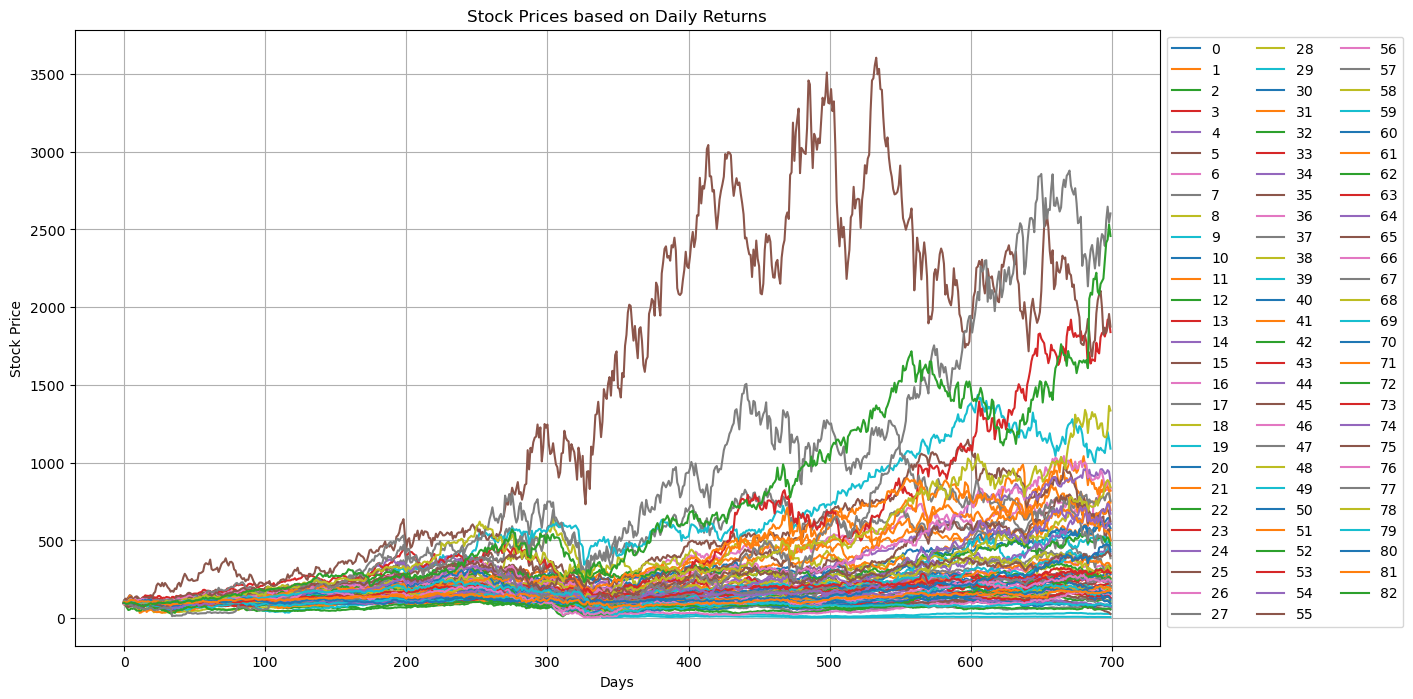

In [4]:
# Calculate cumulative returns
cumulative_returns = (1 + asset_returns).cumprod()

# Assume a starting price of 100 for each asset
starting_price = 100
stock_prices = cumulative_returns * starting_price

# Plot the stock prices
plt.figure(figsize=(14, 8))
for column in stock_prices.columns:
    plt.plot(stock_prices.index, stock_prices[column], label=column)

plt.title('Stock Prices based on Daily Returns')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=3)
plt.grid(True)
plt.savefig('stock_returns.png', bbox_inches='tight')
plt.show()

### Visualizing Results Data : Average Return Data

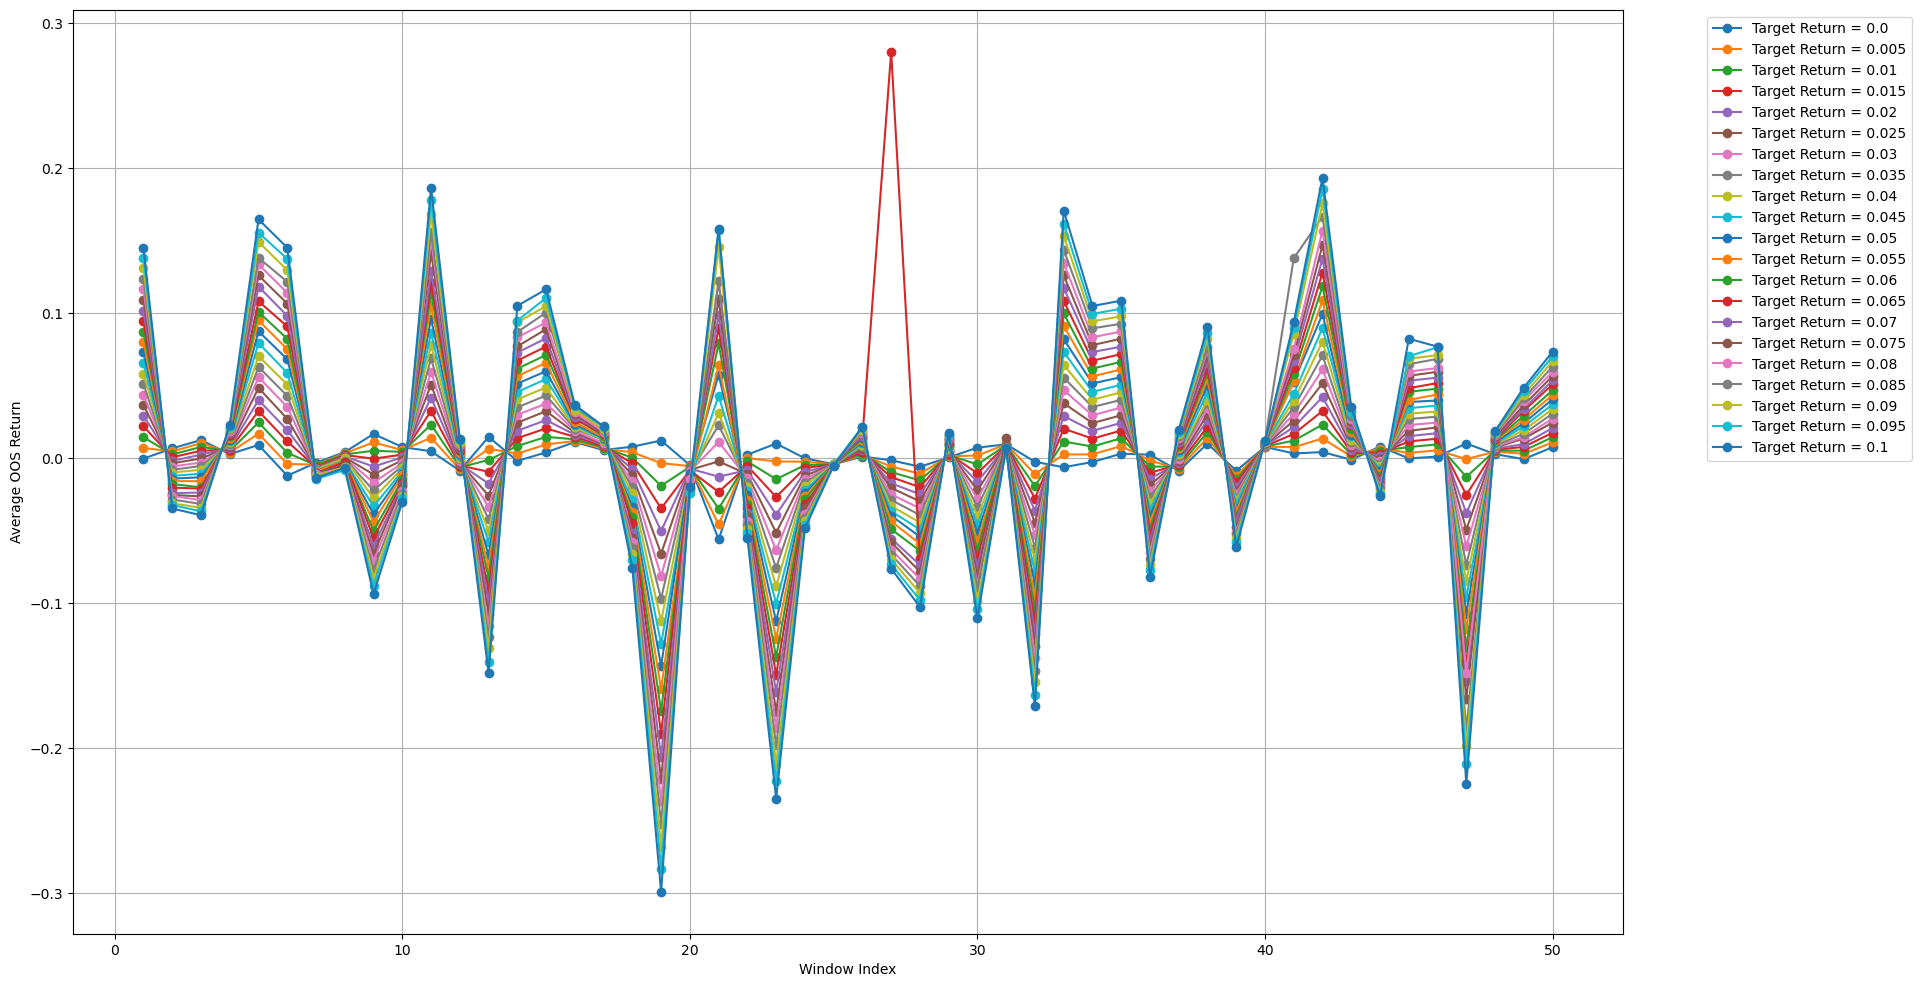

In [5]:
# Plot returns for each target return over periods with legend outside
plt.figure(figsize=(20, 12))

# Group the data by 'Target_Return'
grouped = results.groupby('Target_Return')

# Plot each group
for name, group in grouped:
    plt.plot(group['Period'], group['Mean_Return'], marker='o', linestyle='-', label=f'Target Return = {name}')

plt.xlabel('Window Index')
plt.ylabel('Average OOS Return')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
# Save the plot
plt.savefig('mean_returns_plot.png', bbox_inches='tight')
plt.show()

### Visualizing Stock Returns : Cummulative average returns data

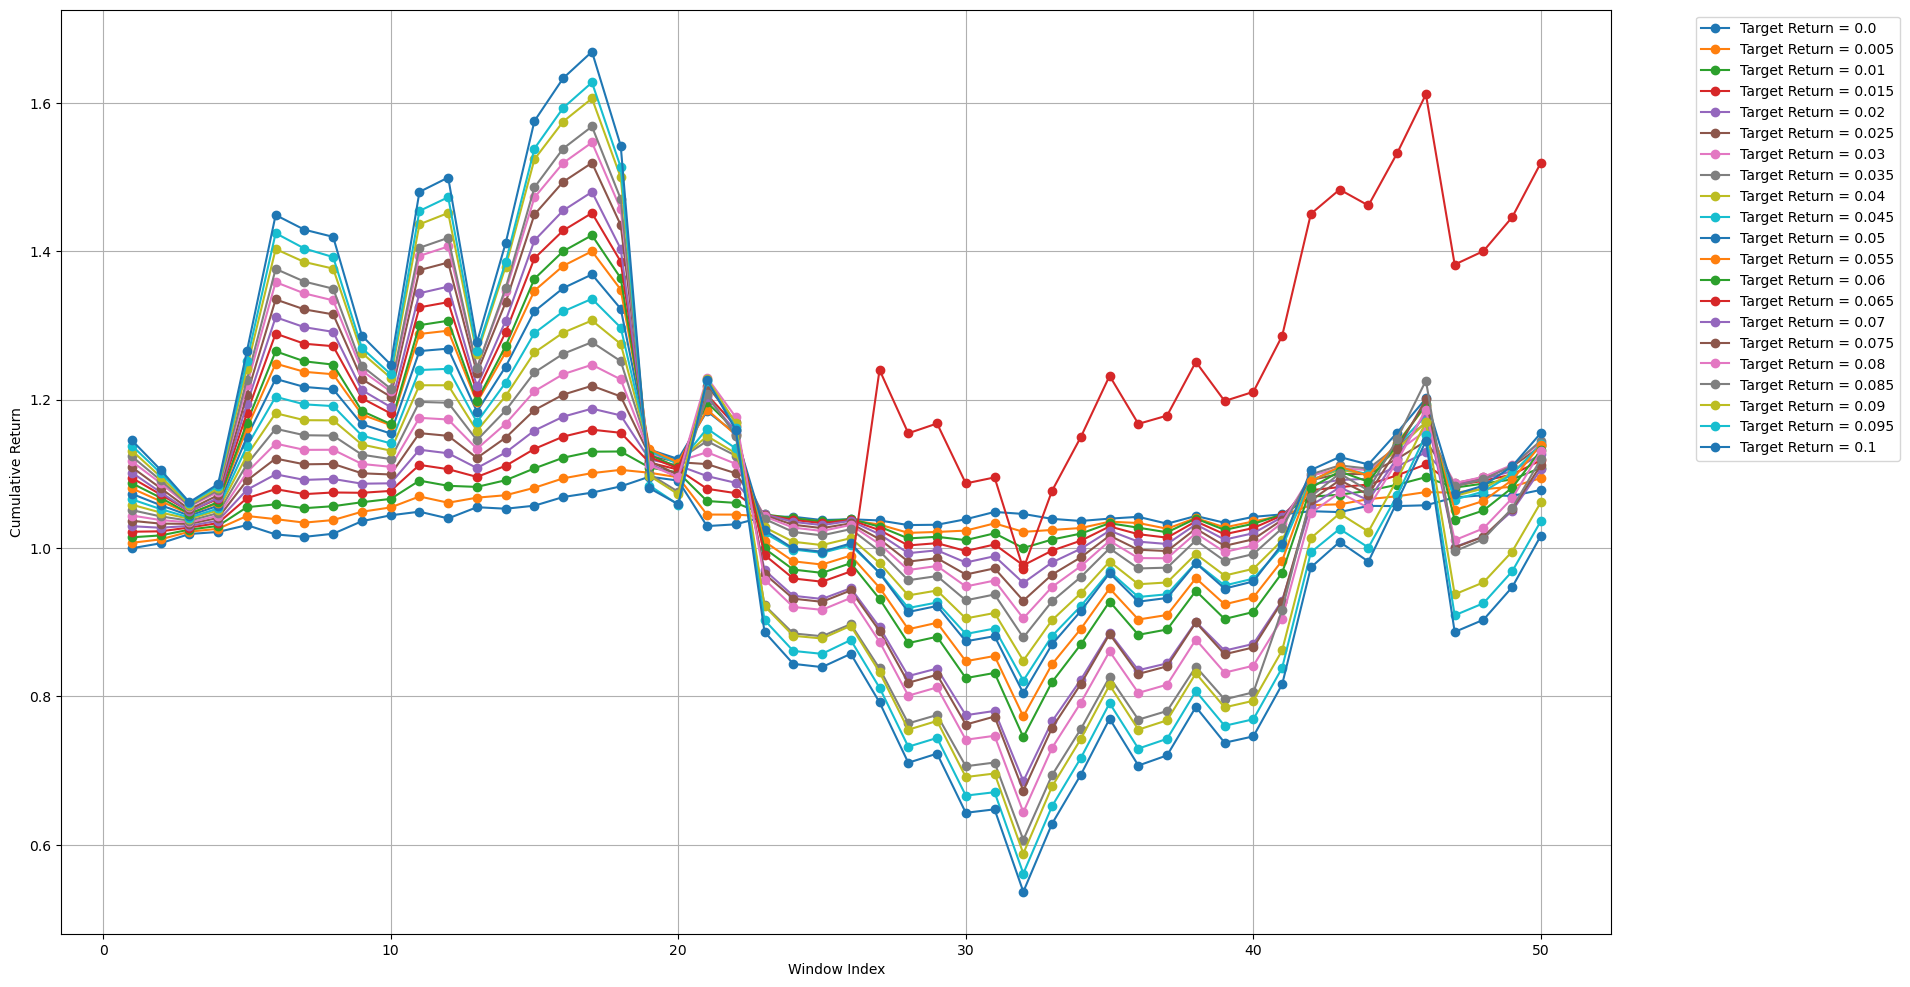

In [6]:
# Add 1 to Mean_Return to calculate cumulative return correctly
results['Adjusted_Return'] = results['Mean_Return'] + 1

# Calculate the cumulative returns for each target return, setting initial value to 1
results['Cumulative_Return'] = results.groupby('Target_Return')['Adjusted_Return'].cumprod()

# Plot cumulative returns for each target return over periods with legend outside
plt.figure(figsize=(20, 12))

# Group the data by 'Target_Return'
grouped = results.groupby('Target_Return')

# Plot each group's cumulative returns
for name, group in grouped:
    plt.plot(group['Period'], group['Cumulative_Return'], marker='o', linestyle='-', label=f'Target Return = {name}')

plt.xlabel('Window Index')
plt.ylabel('Cumulative Return')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.savefig('mean_cum_returns_plot.png', bbox_inches='tight')
plt.show()

### Scatter Plot of Returns vs Variance (for one period)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


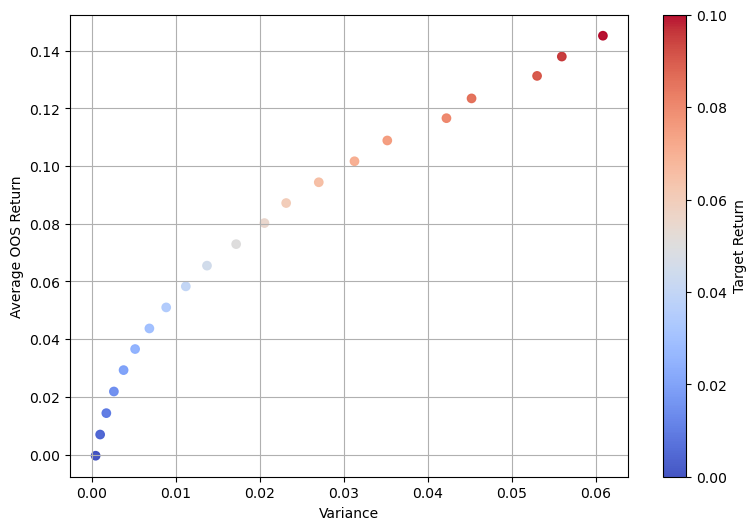

In [9]:
plt.figure(figsize=(9, 6))

# Group the data by 'Target_Return'
results_period_1 = results[results['Period'] == 1]

# Scatter plot with color mapping based on 'Target_Return'
scatter = plt.scatter(results_period_1['Variance'], results_period_1['Mean_Return'],
                      c=results_period_1['Target_Return'], cmap='coolwarm', alpha=0.95)

plt.xlabel('Variance')
plt.ylabel('Average OOS Return')

# Adding a color bar to show the mapping of colors to 'Target_Return'
colorbar = plt.colorbar(scatter)
colorbar.set_label('Target Return')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.savefig('mean_returns_vs_variance.png', bbox_inches='tight')
plt.show()

### Scatter Plot of Returns vs Variance (for all periods)

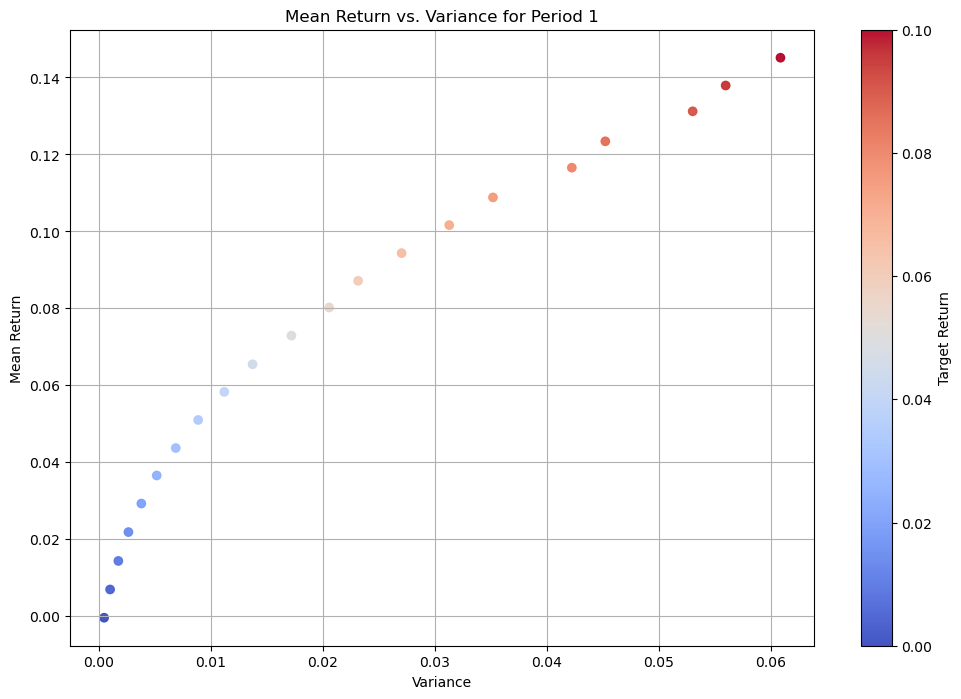

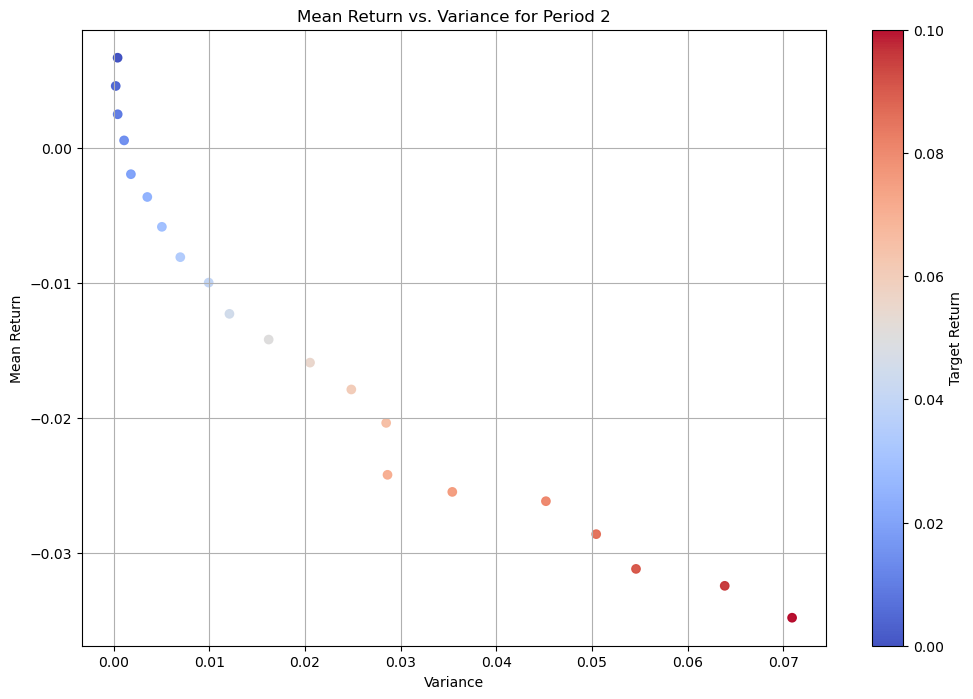

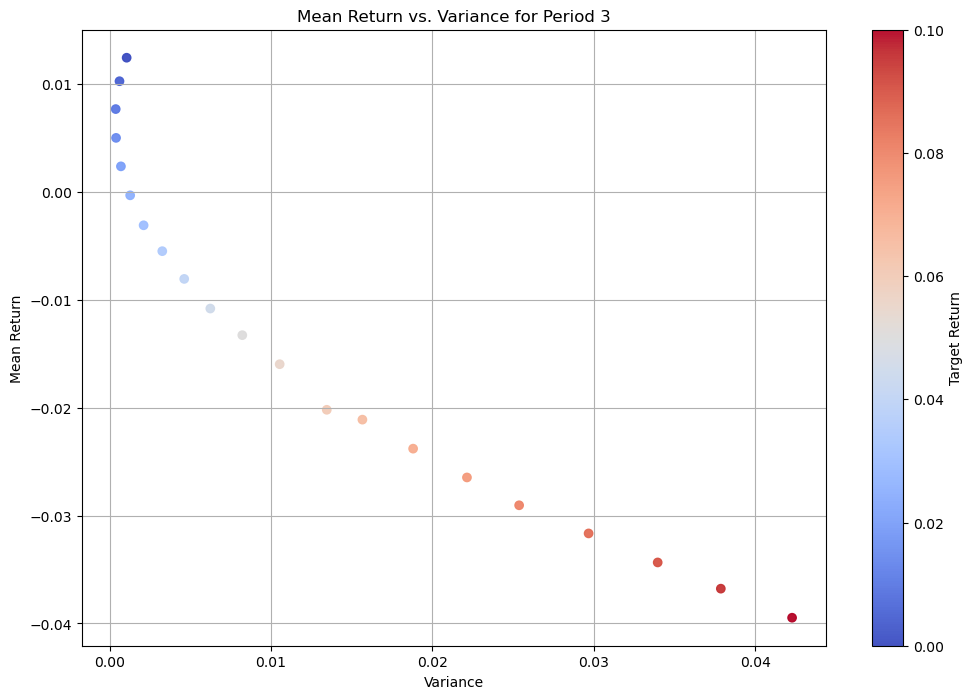

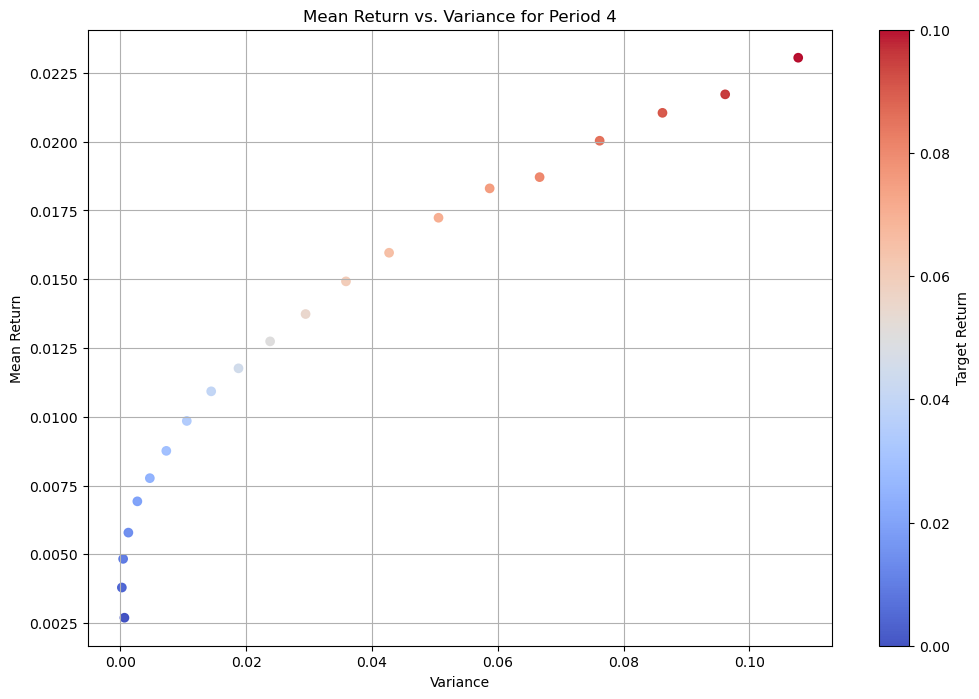

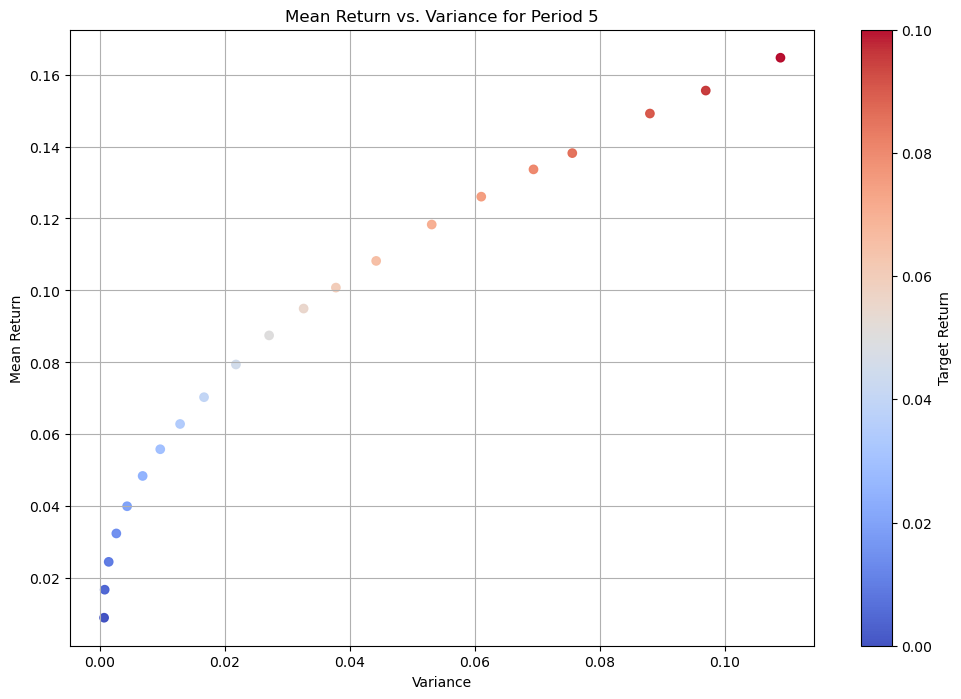

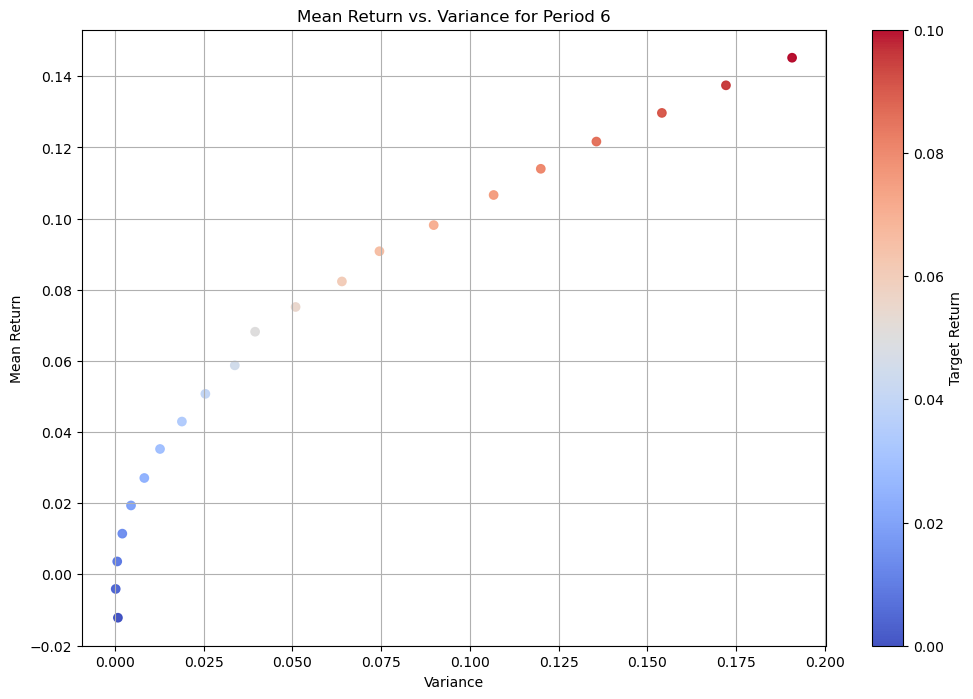

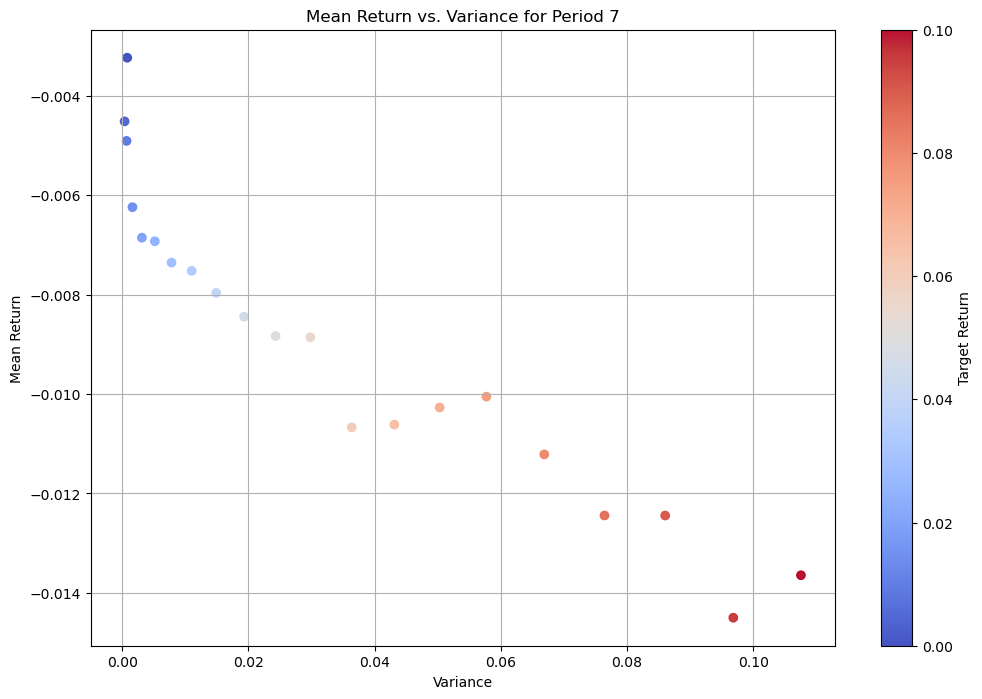

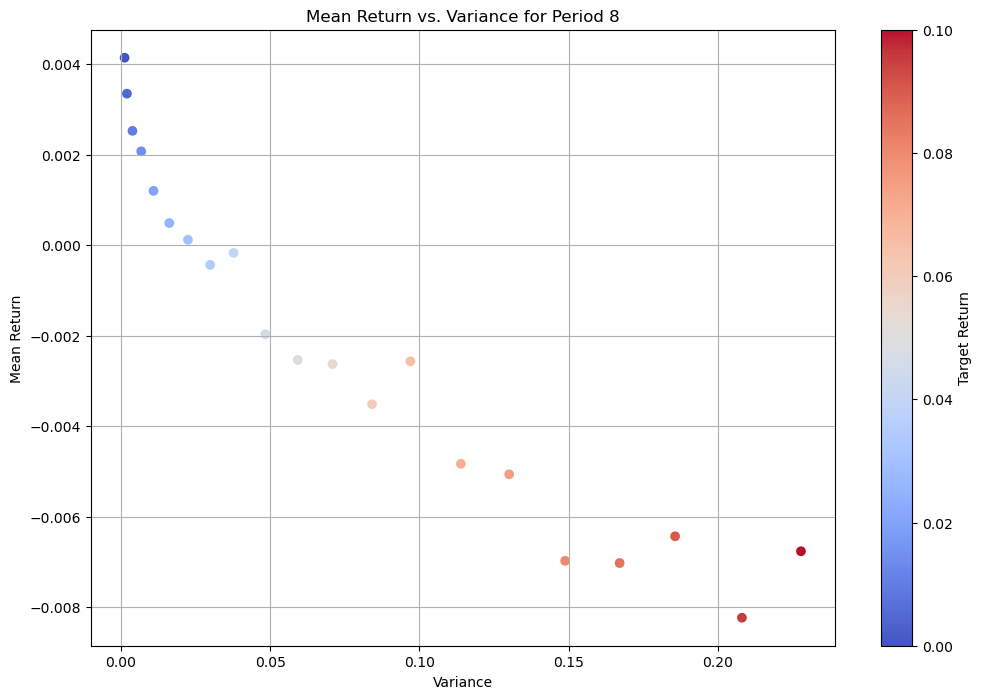

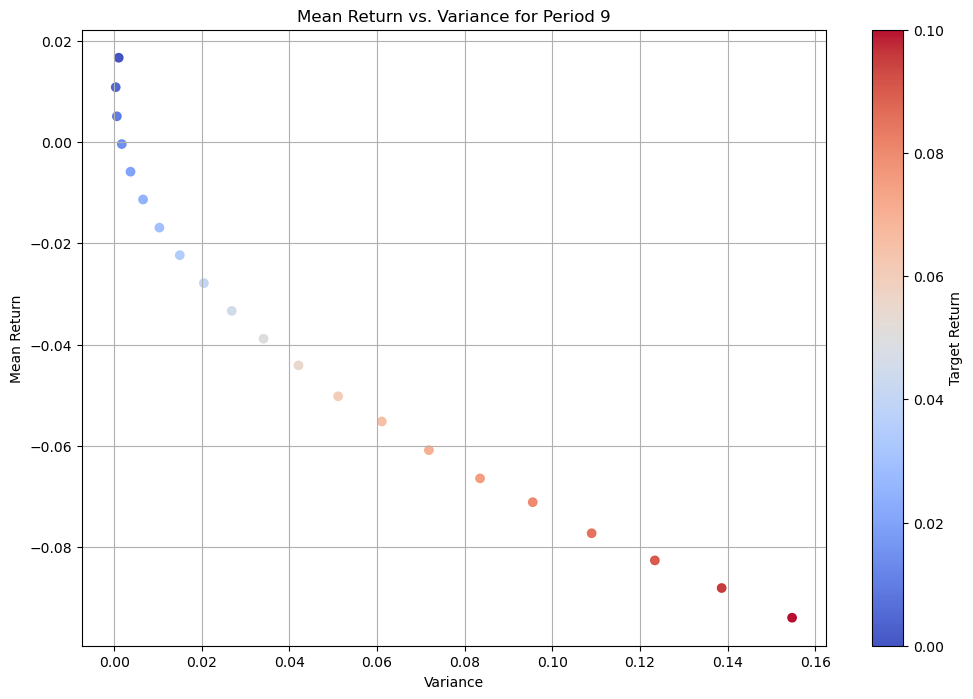

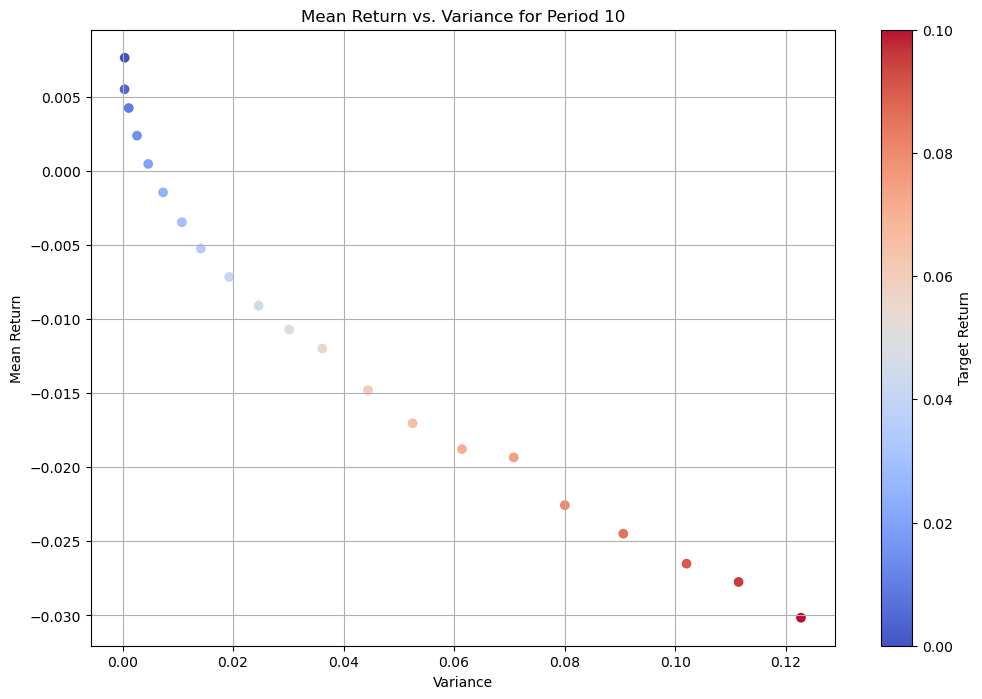

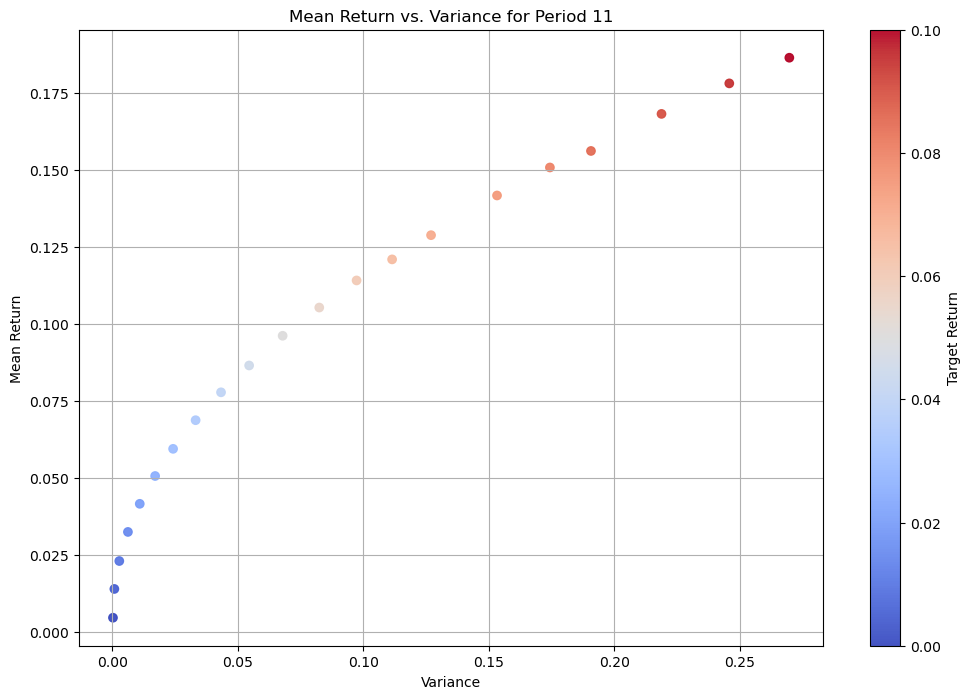

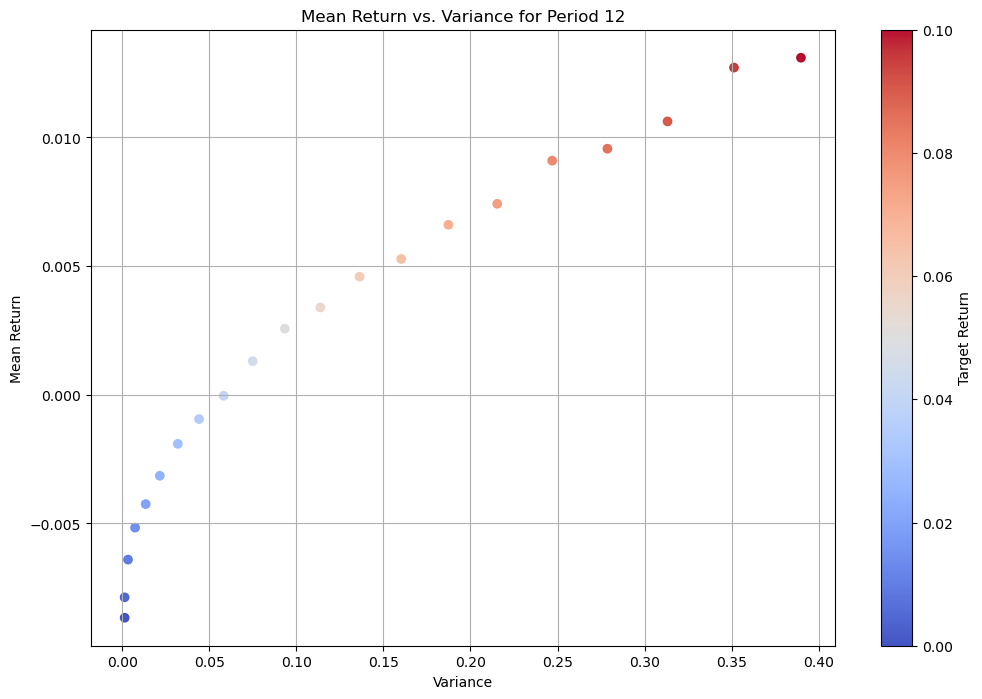

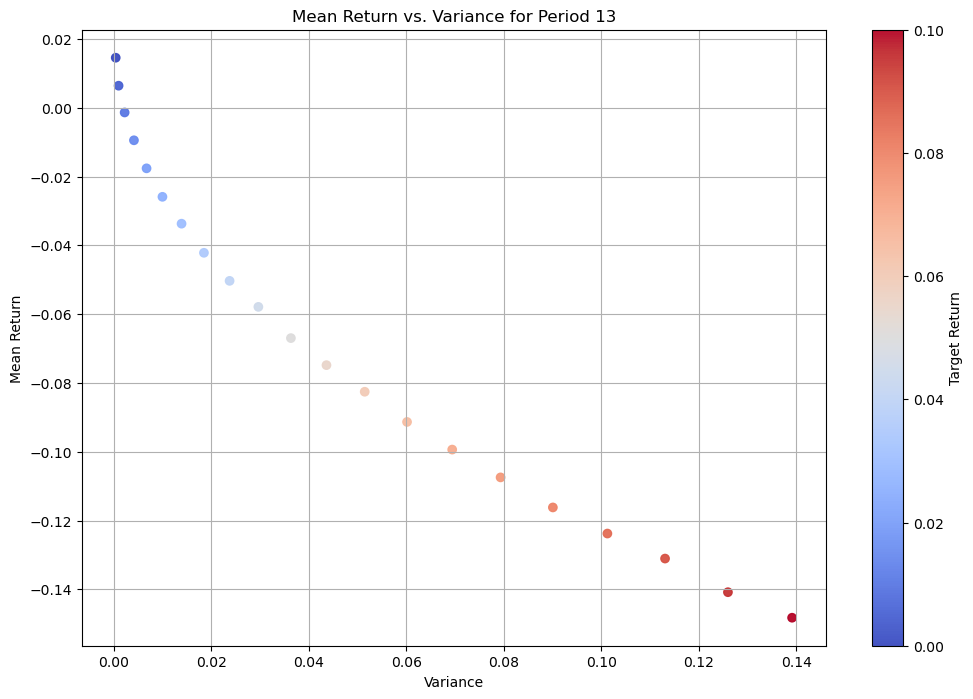

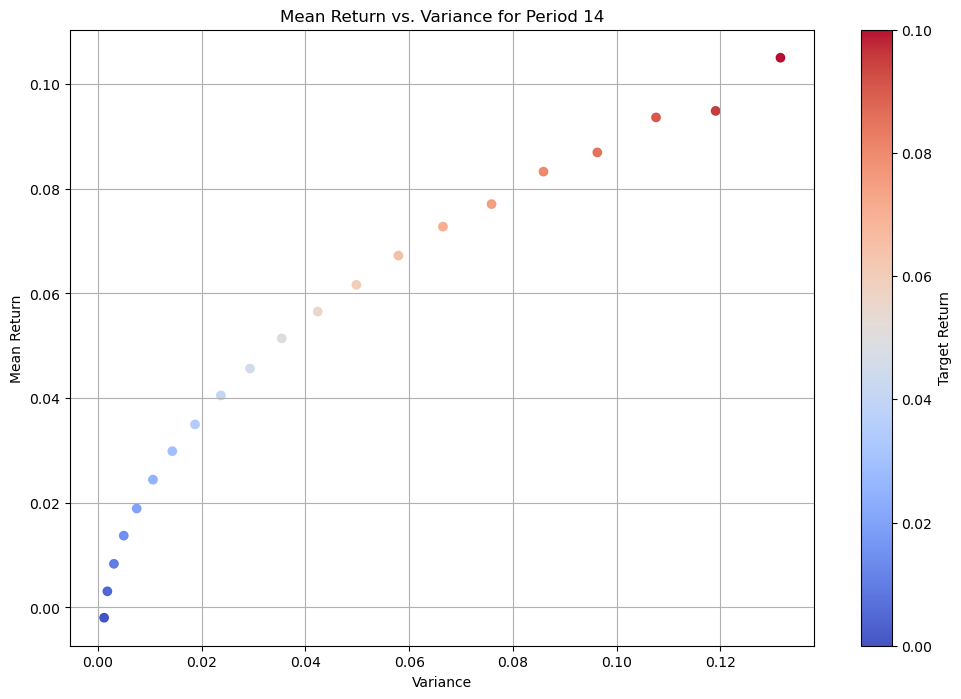

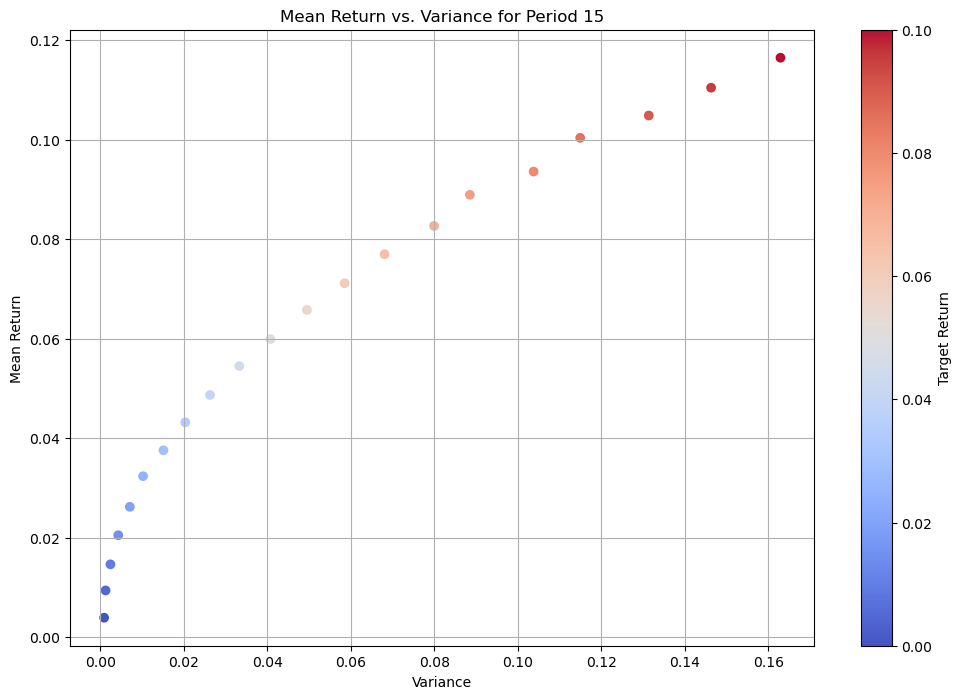

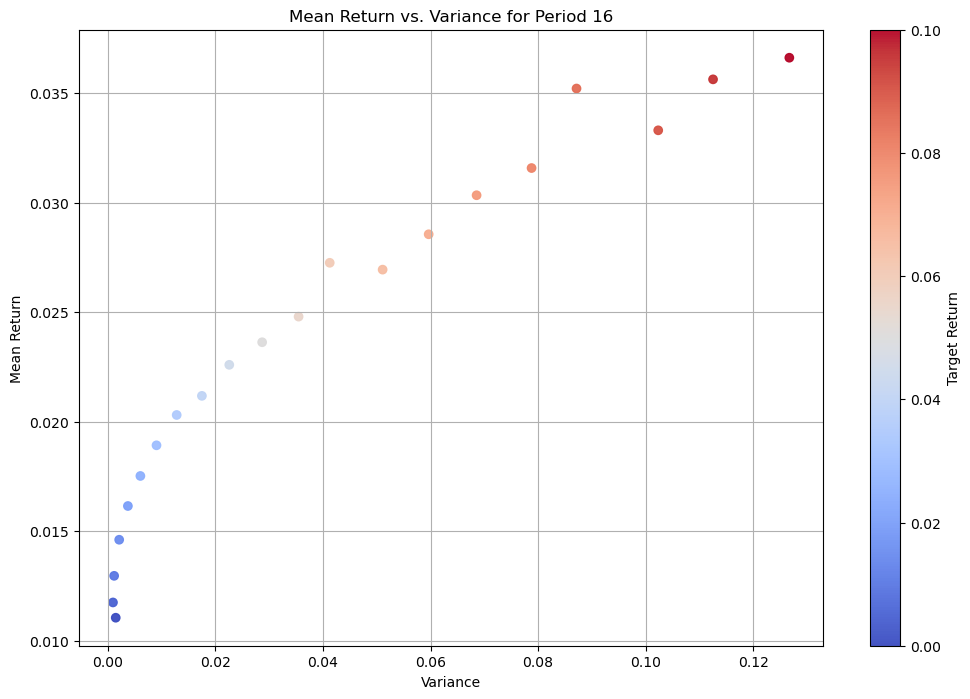

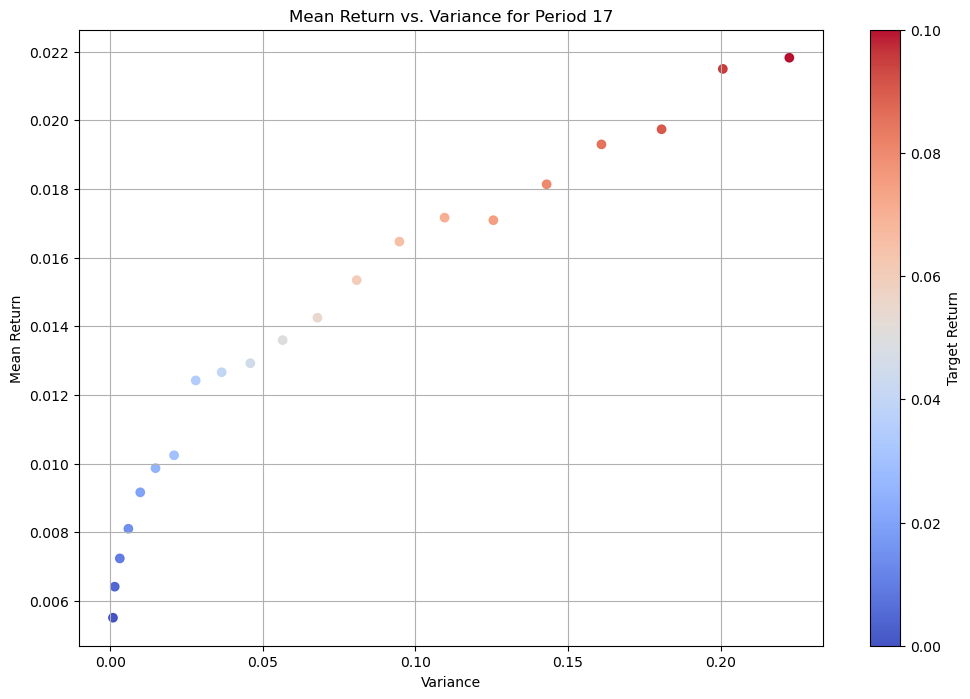

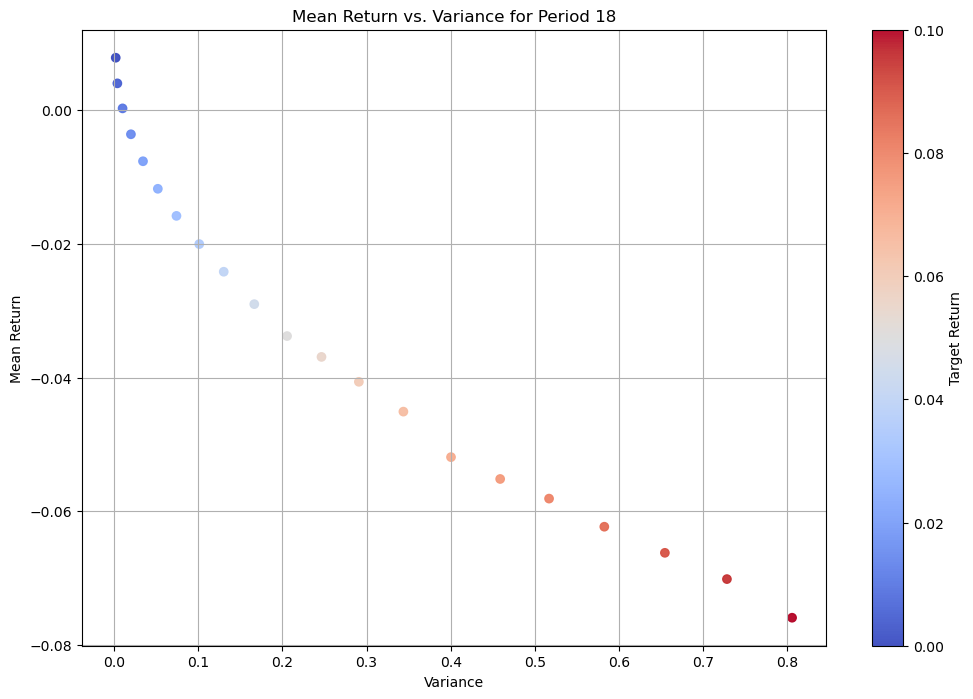

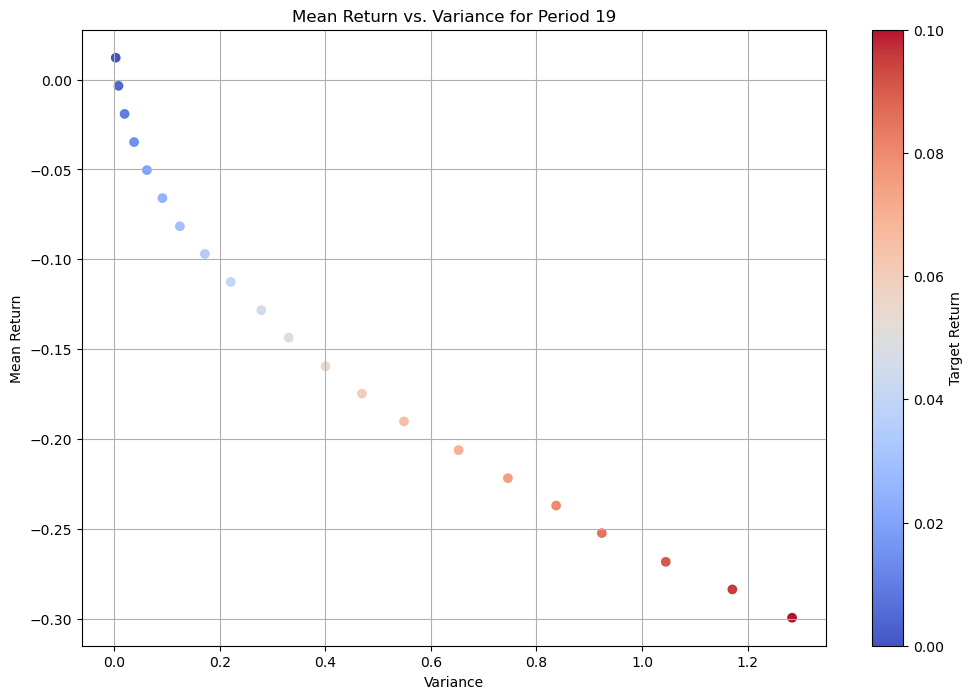

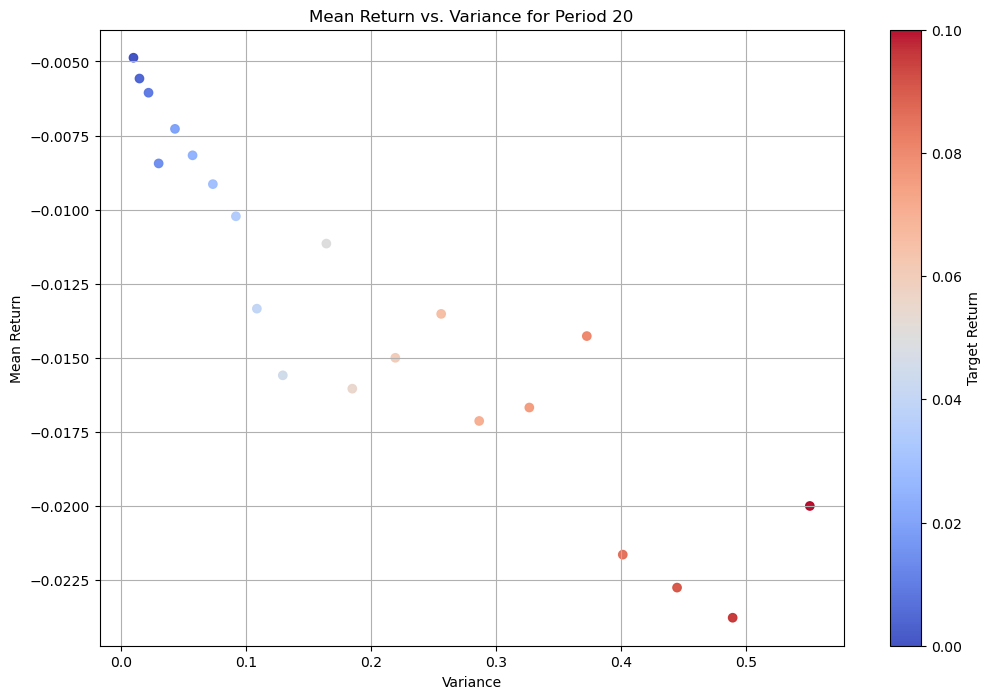

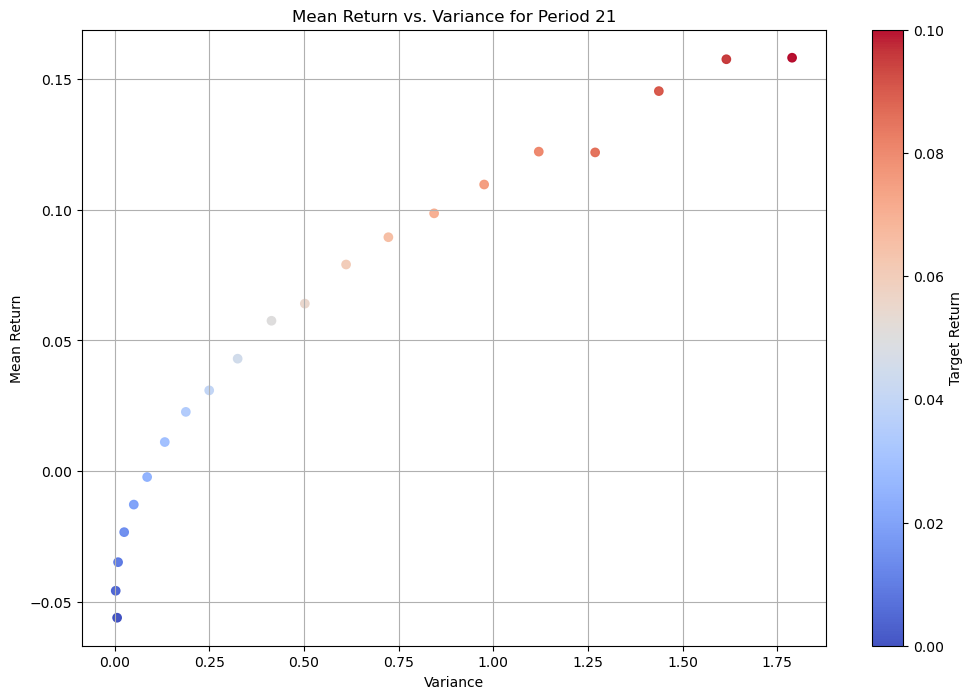

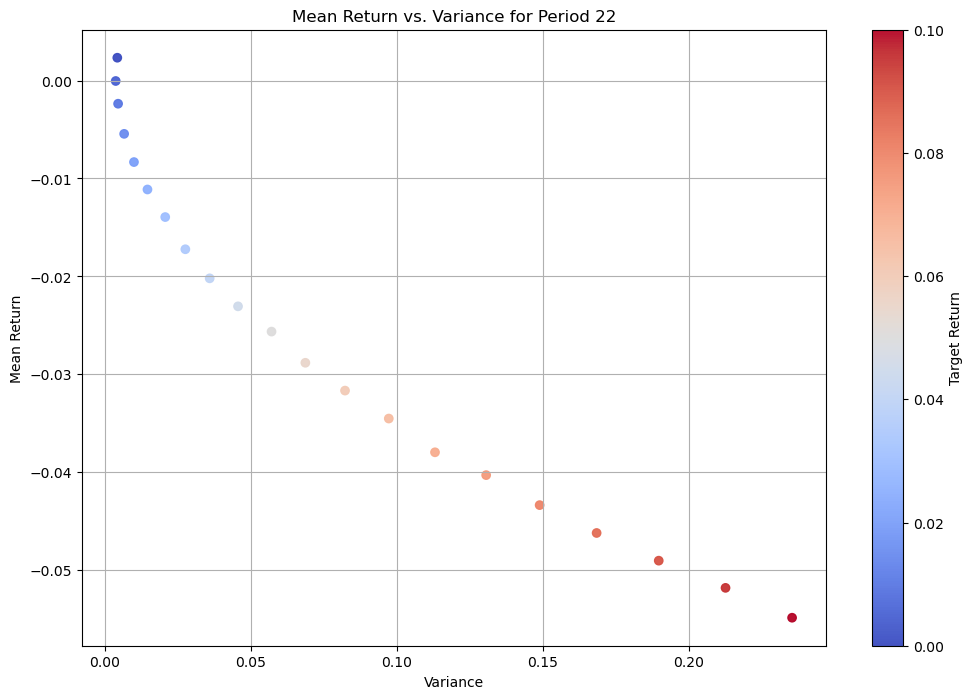

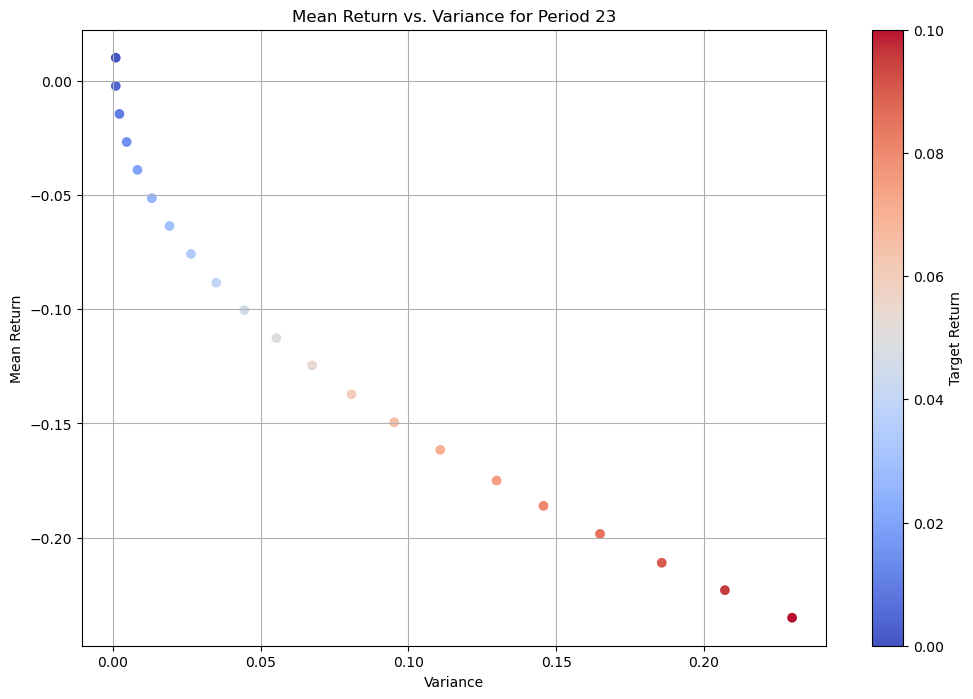

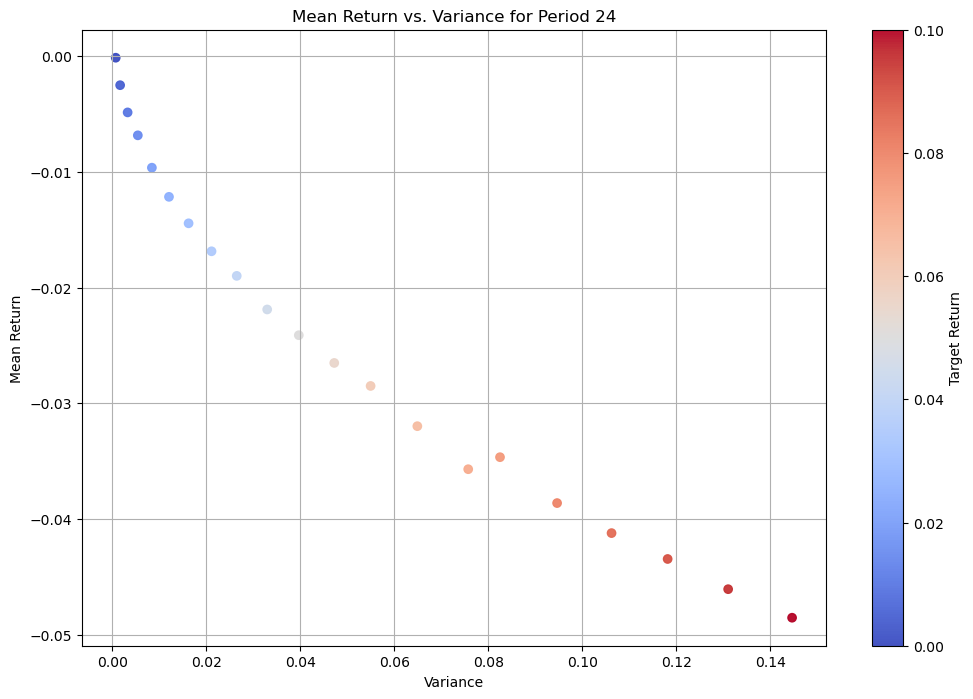

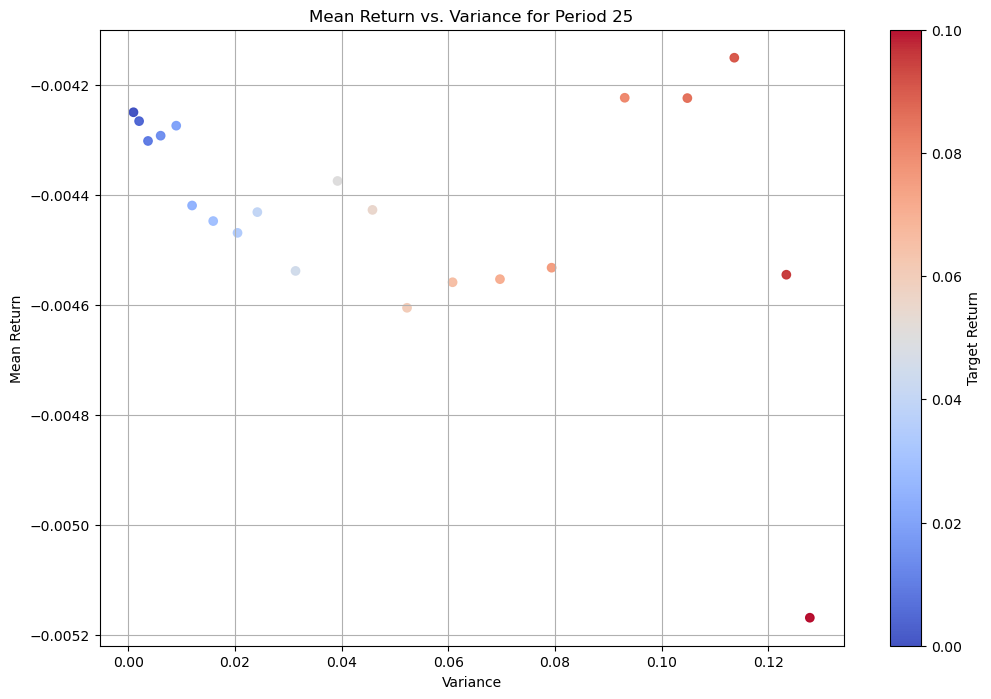

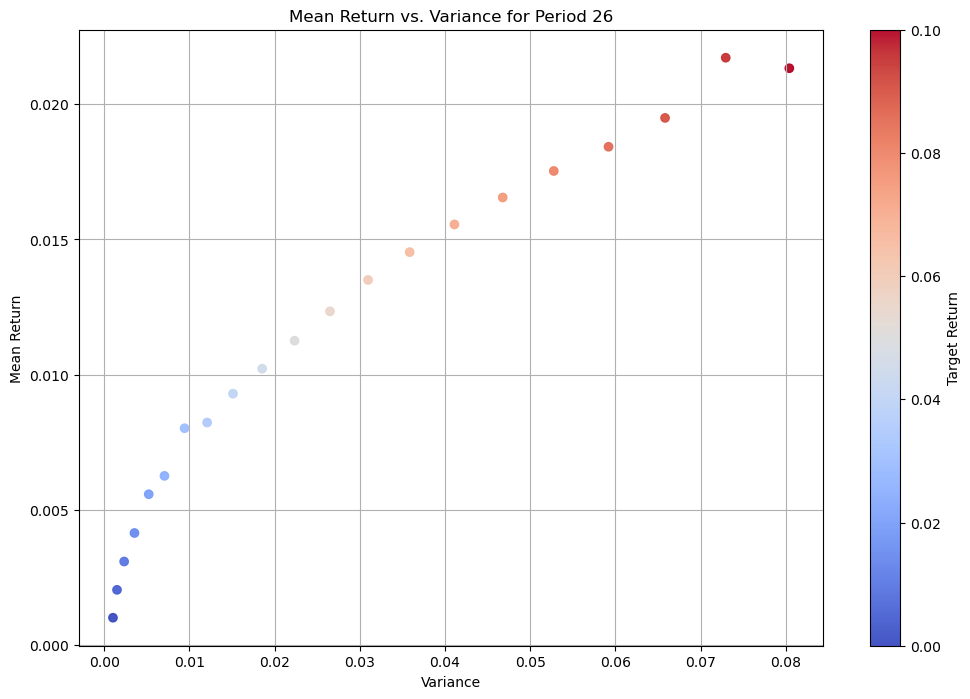

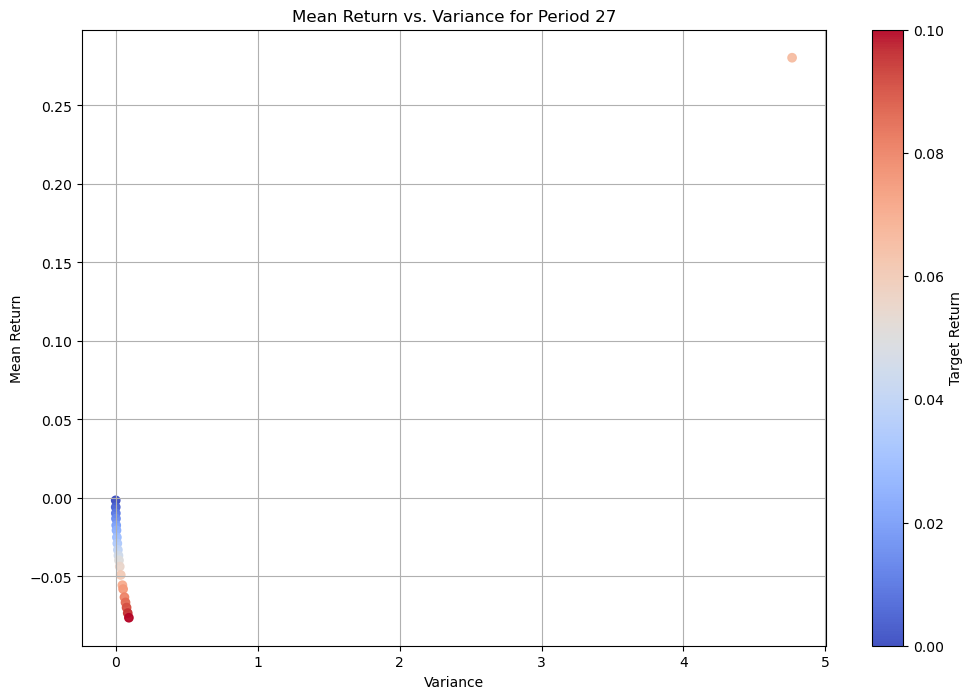

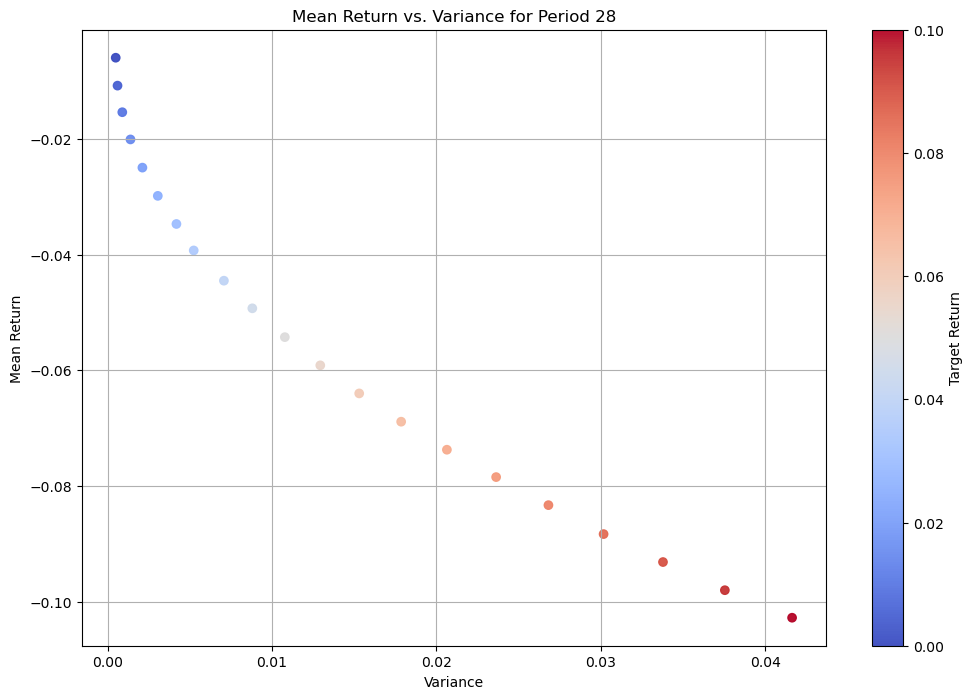

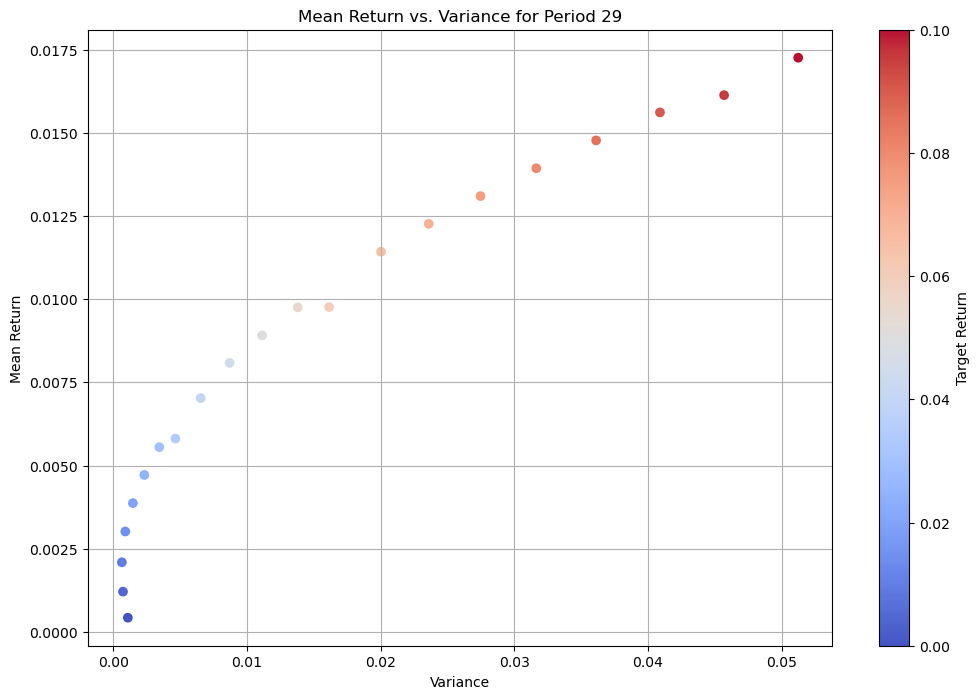

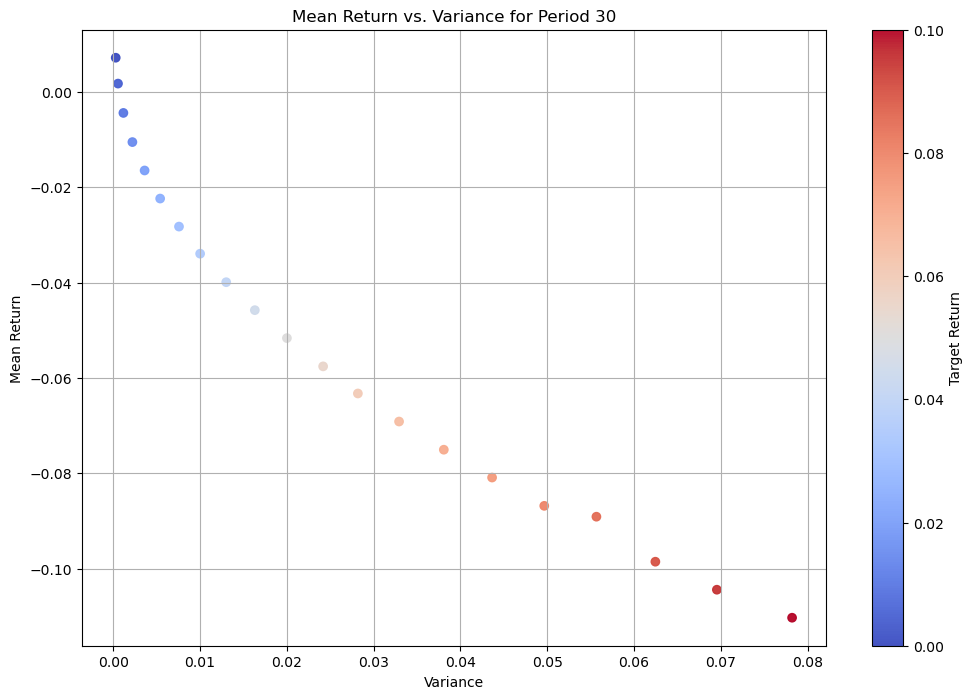

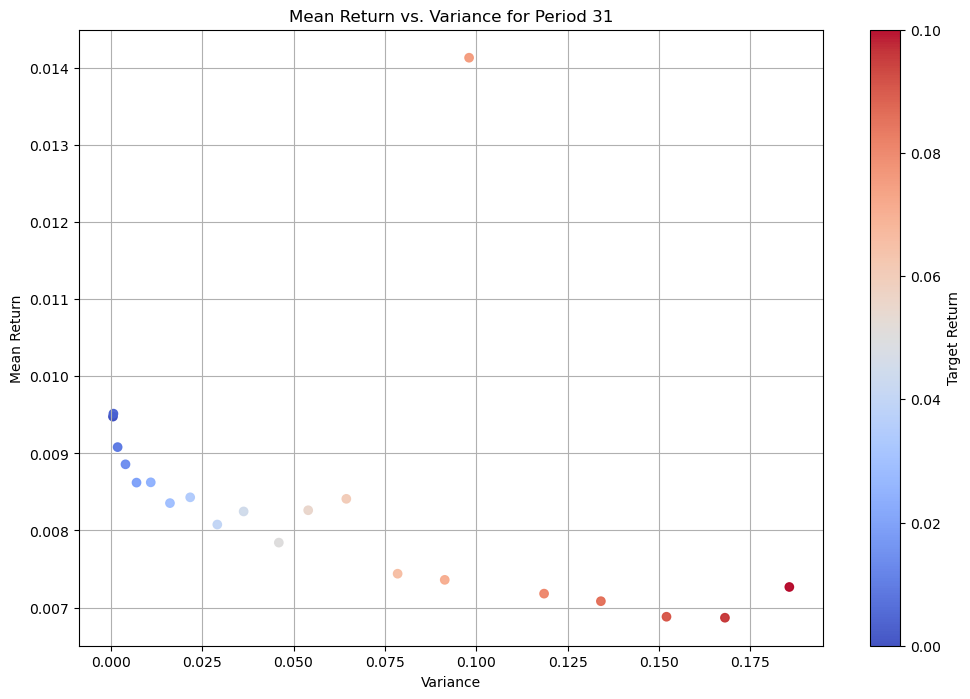

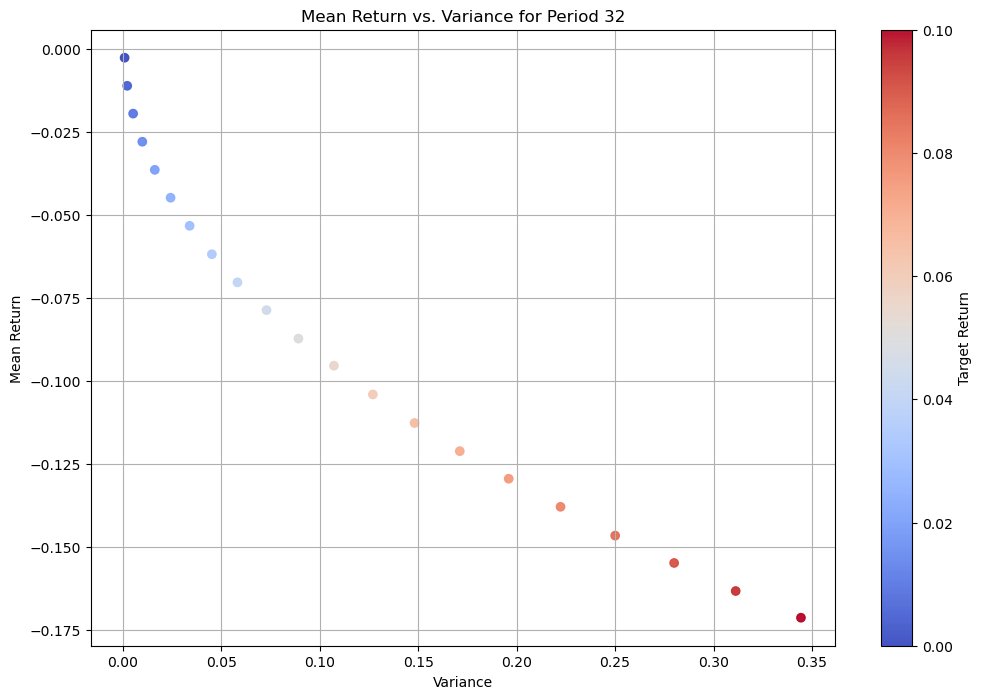

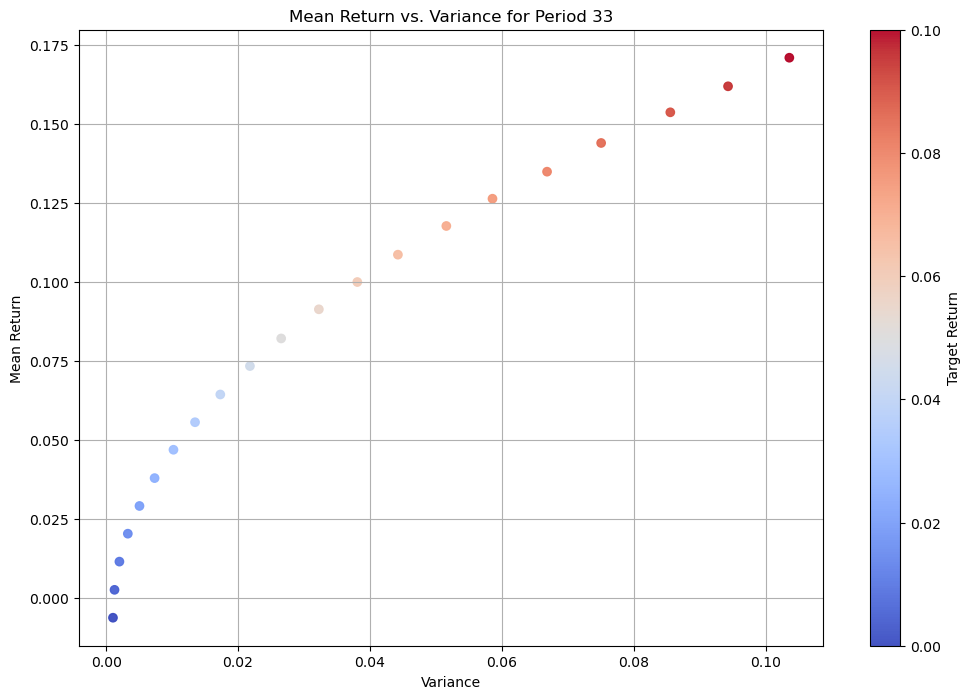

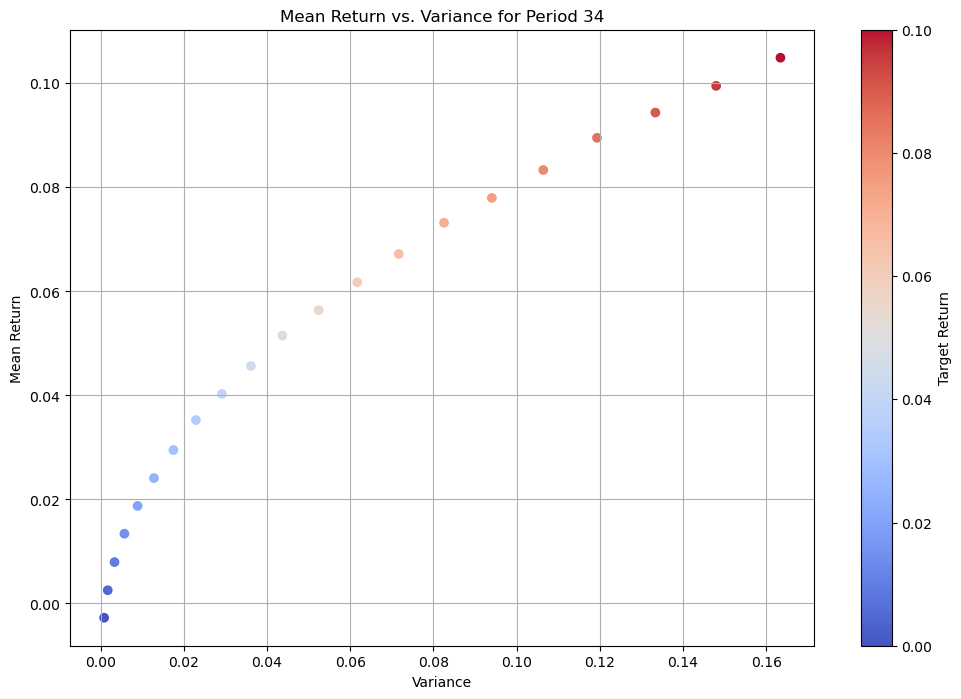

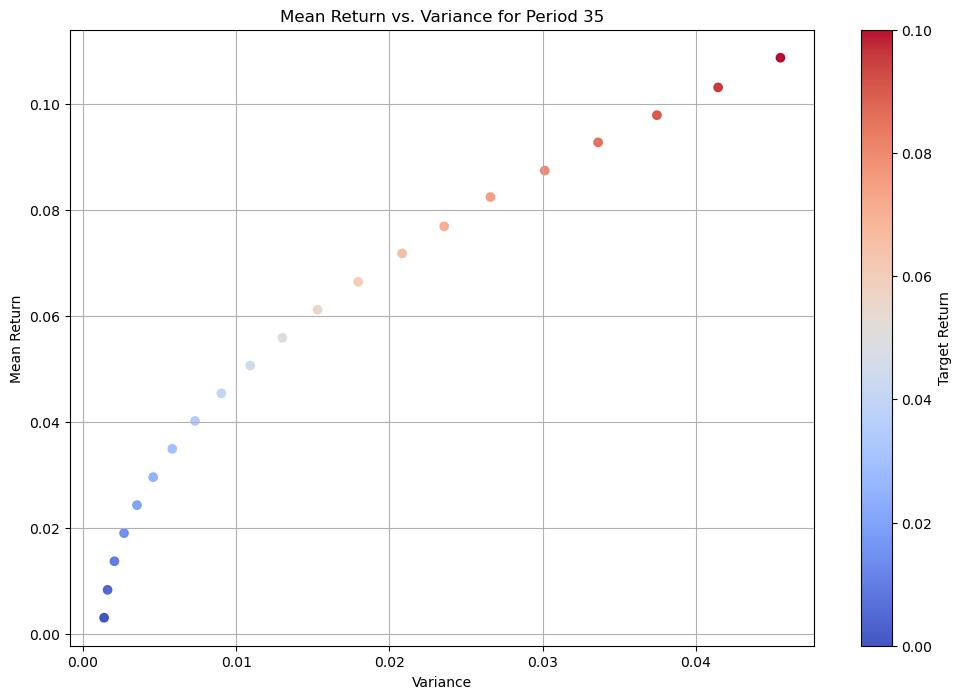

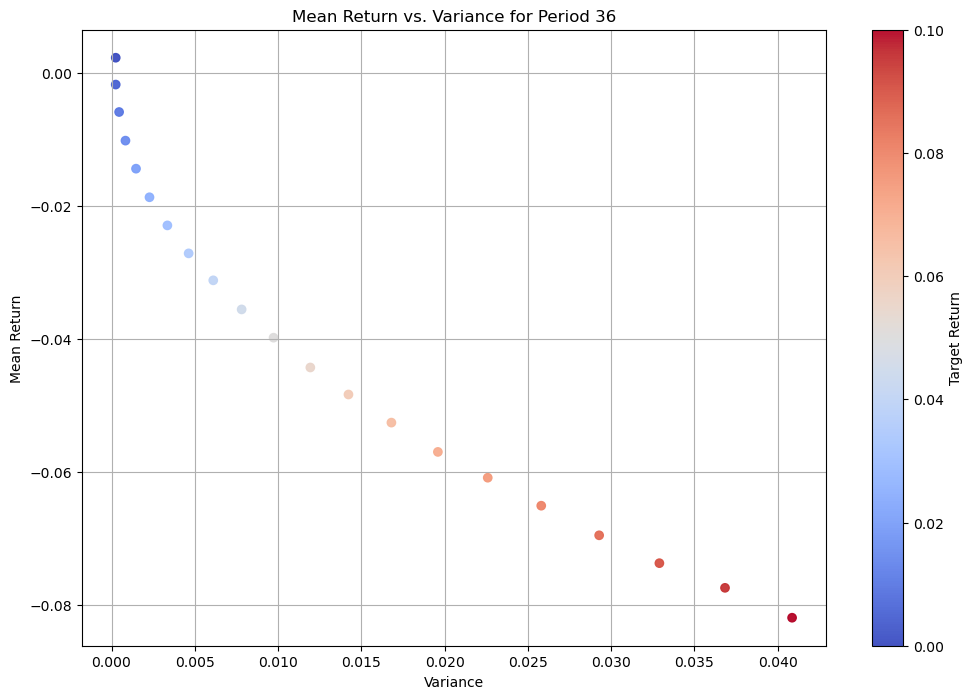

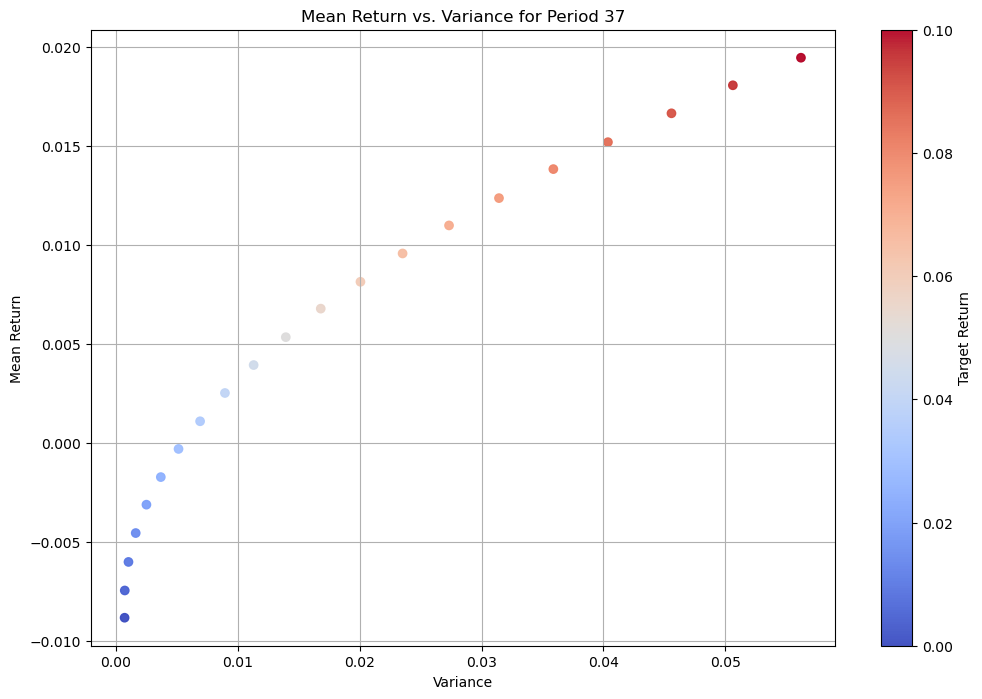

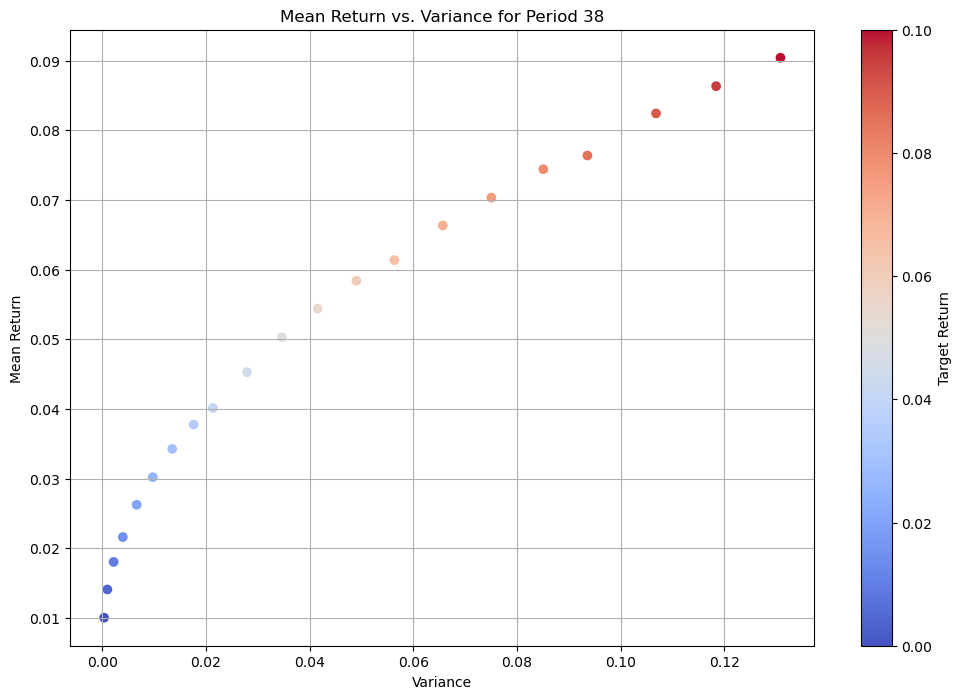

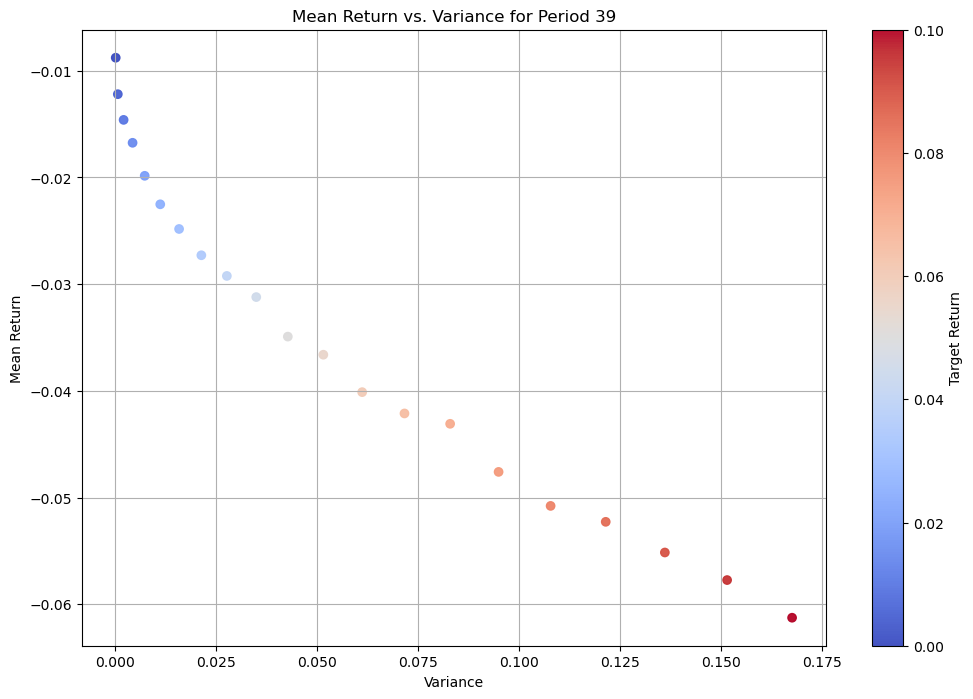

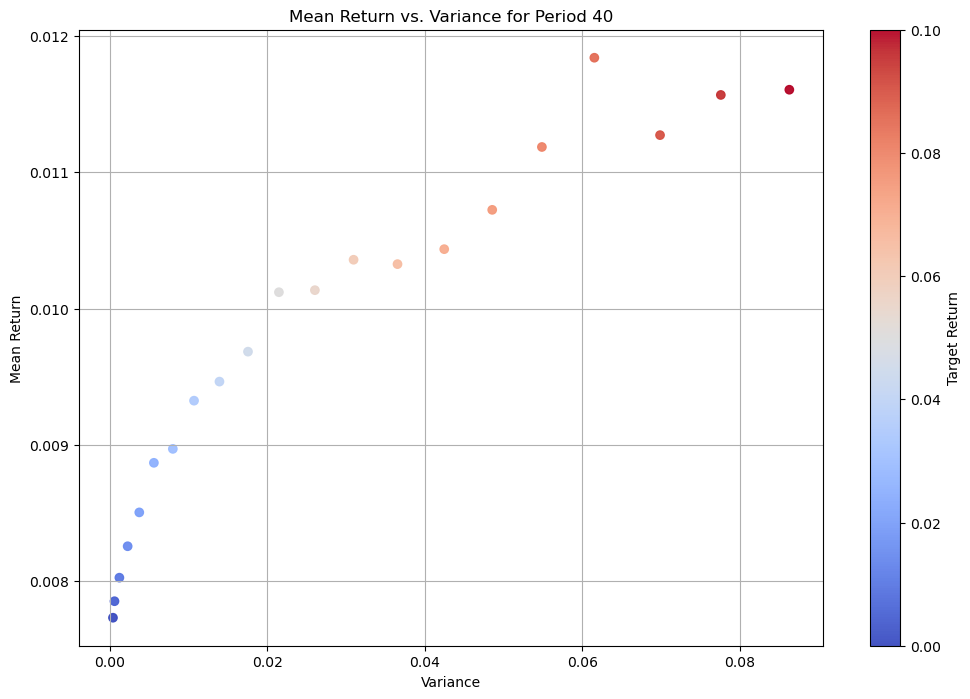

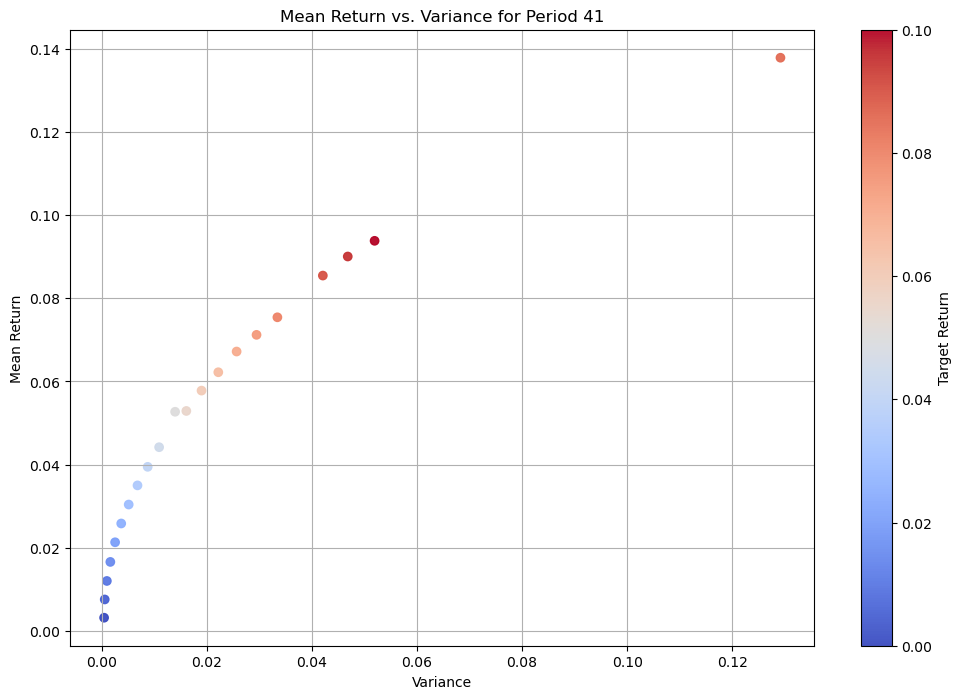

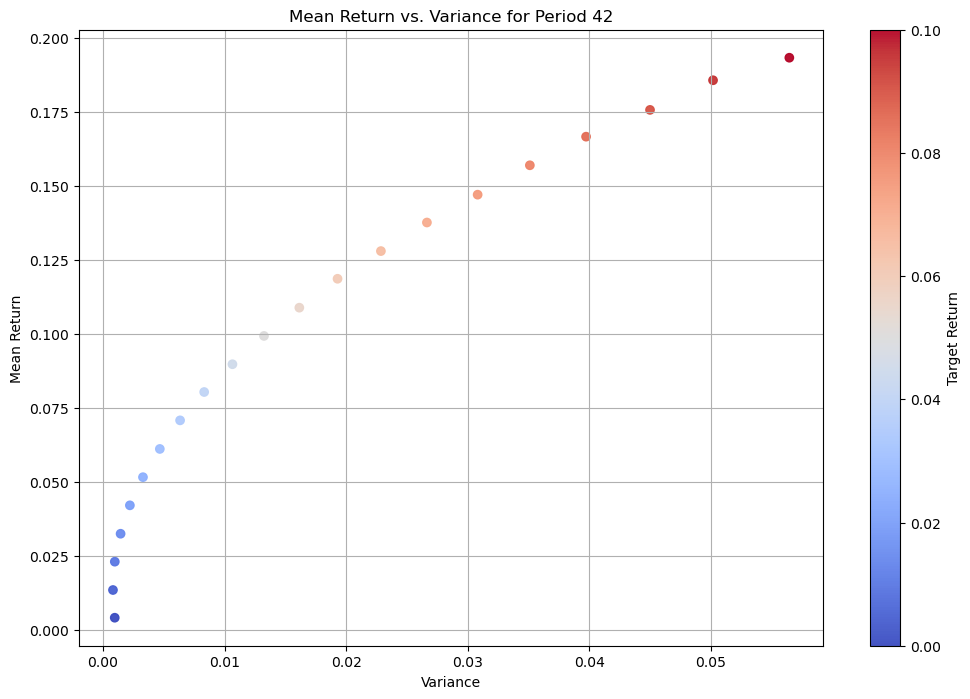

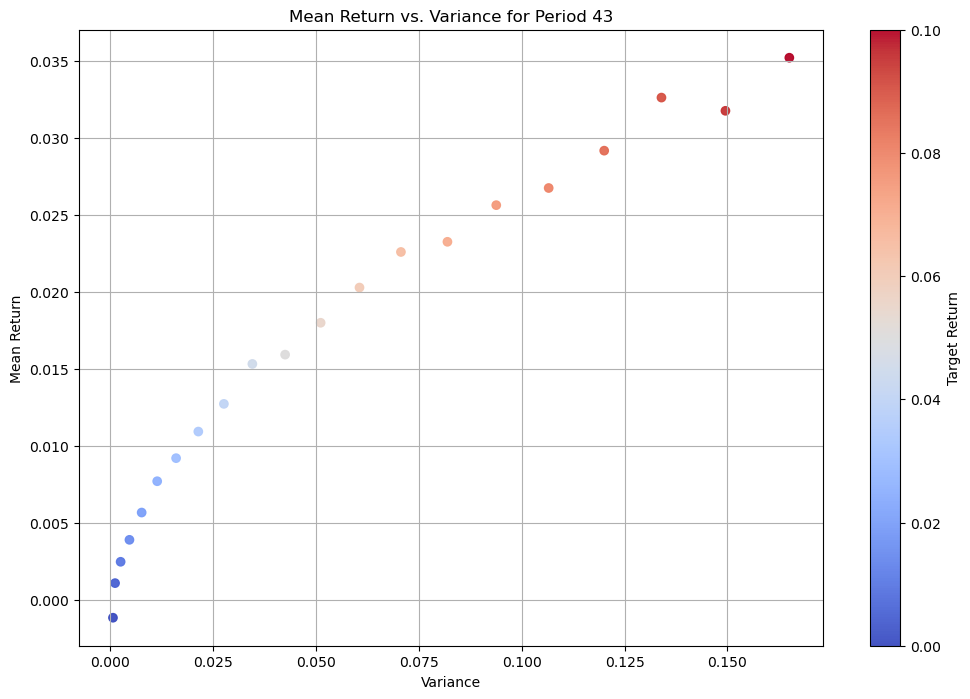

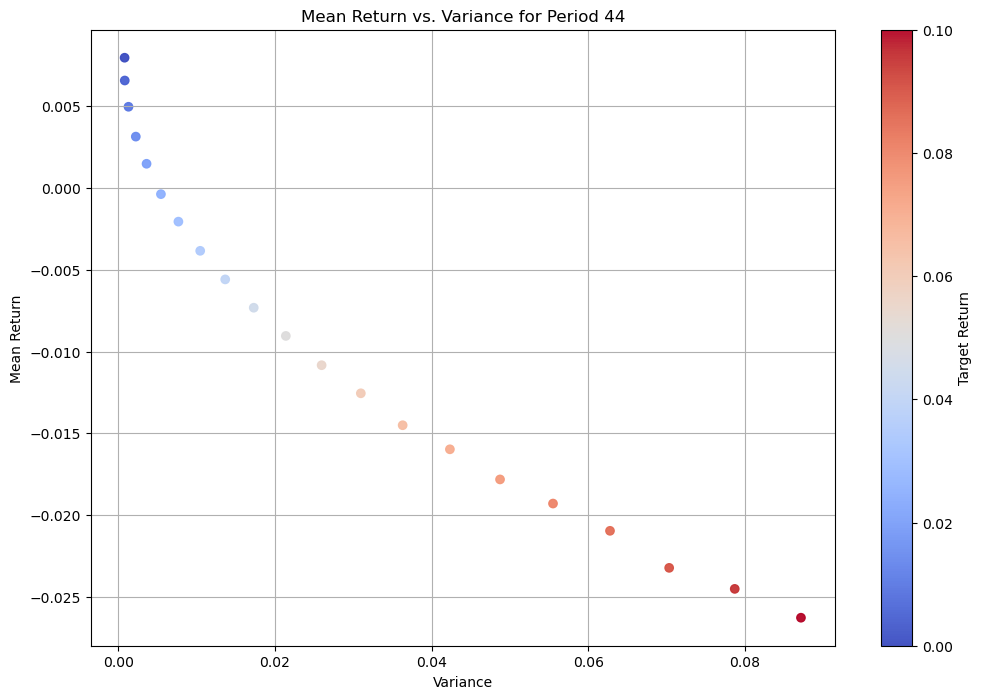

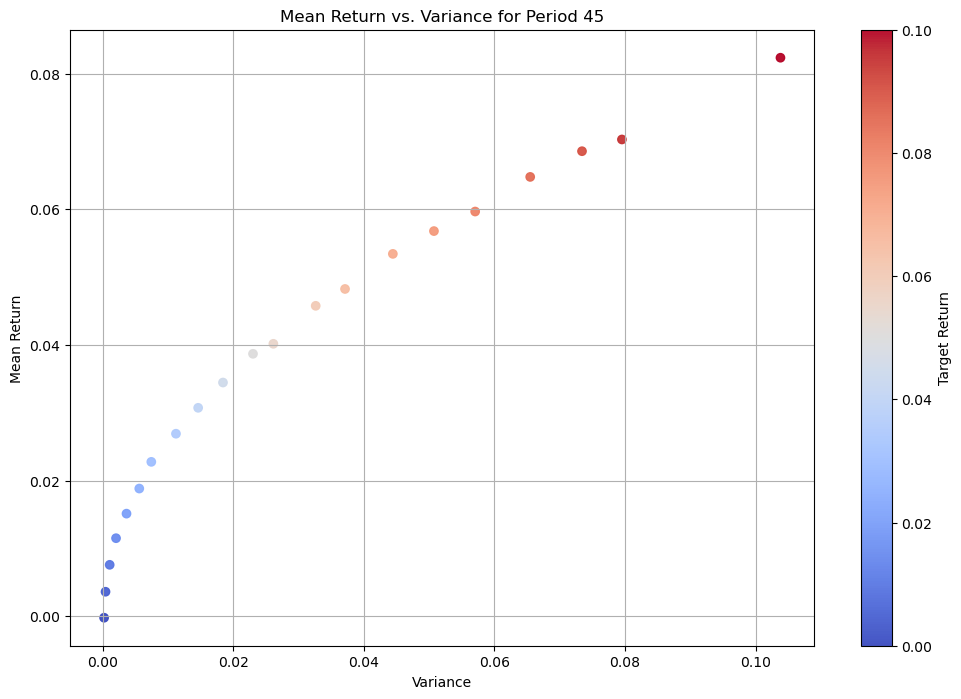

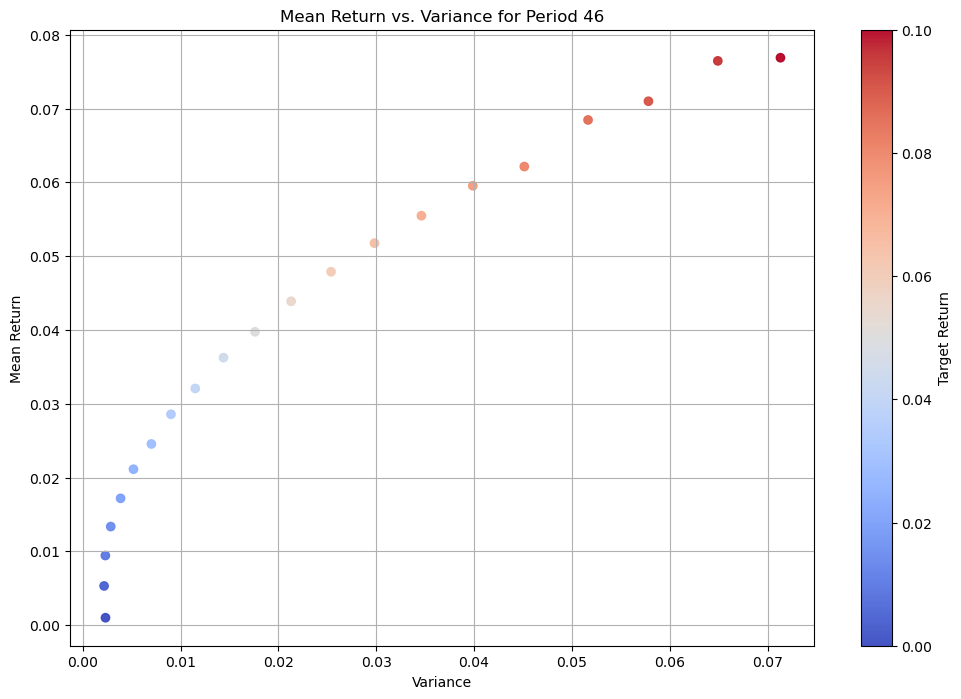

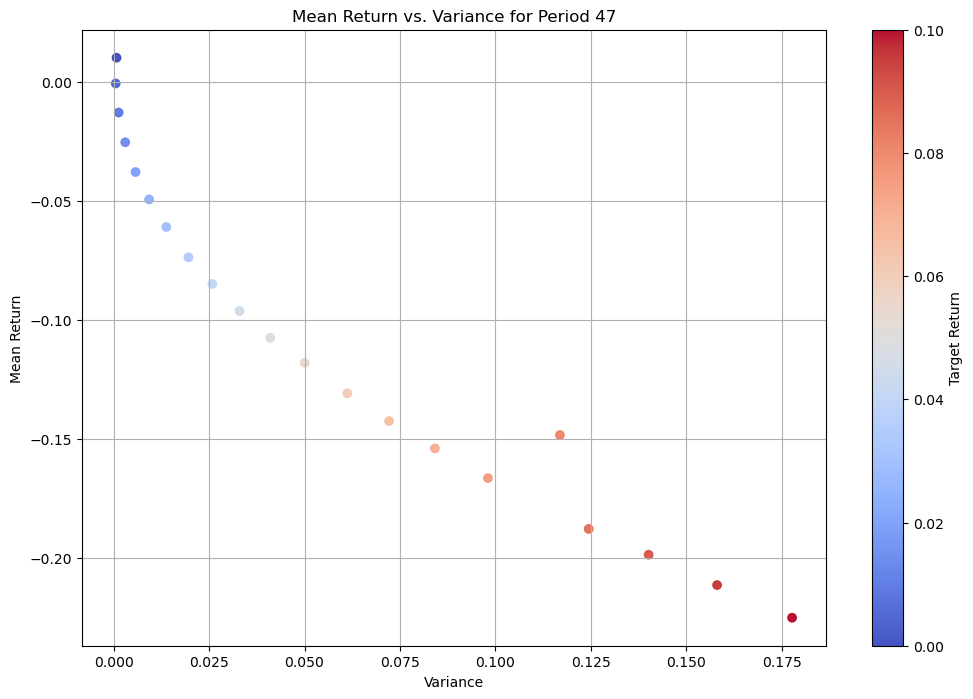

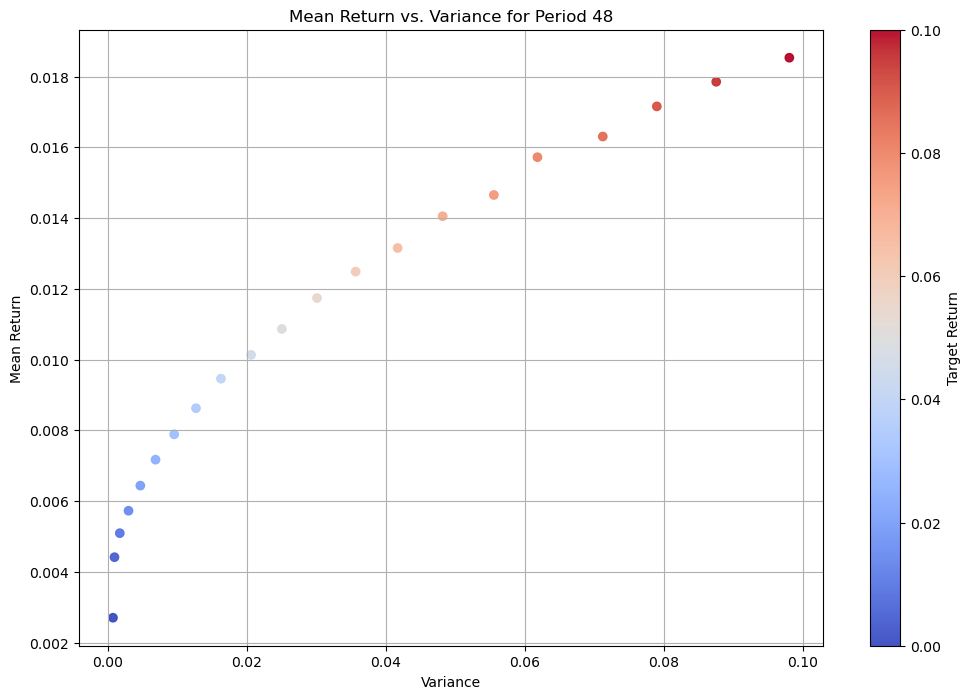

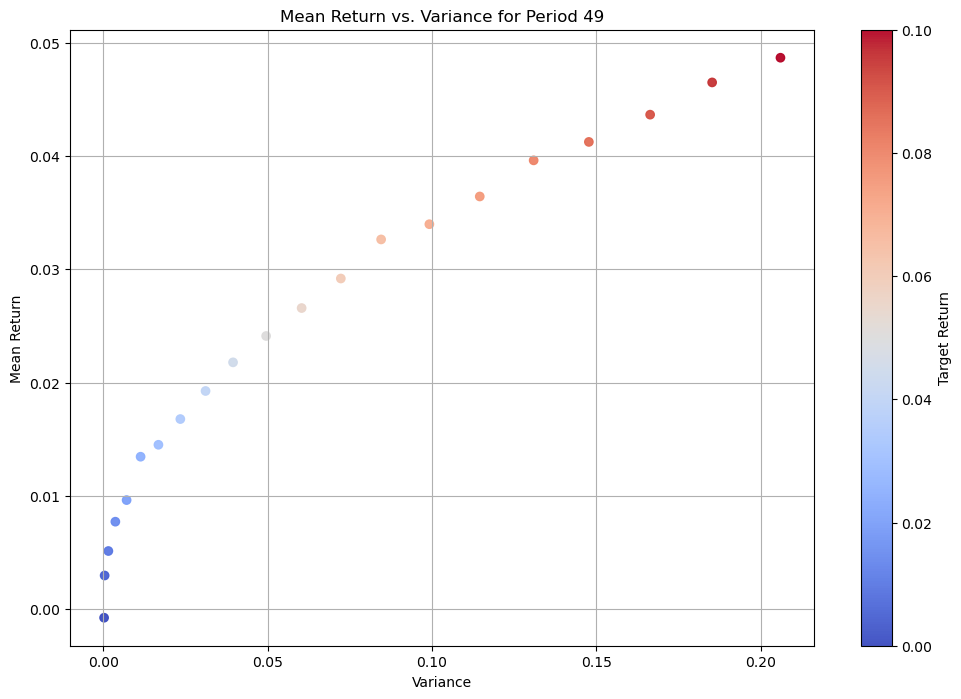

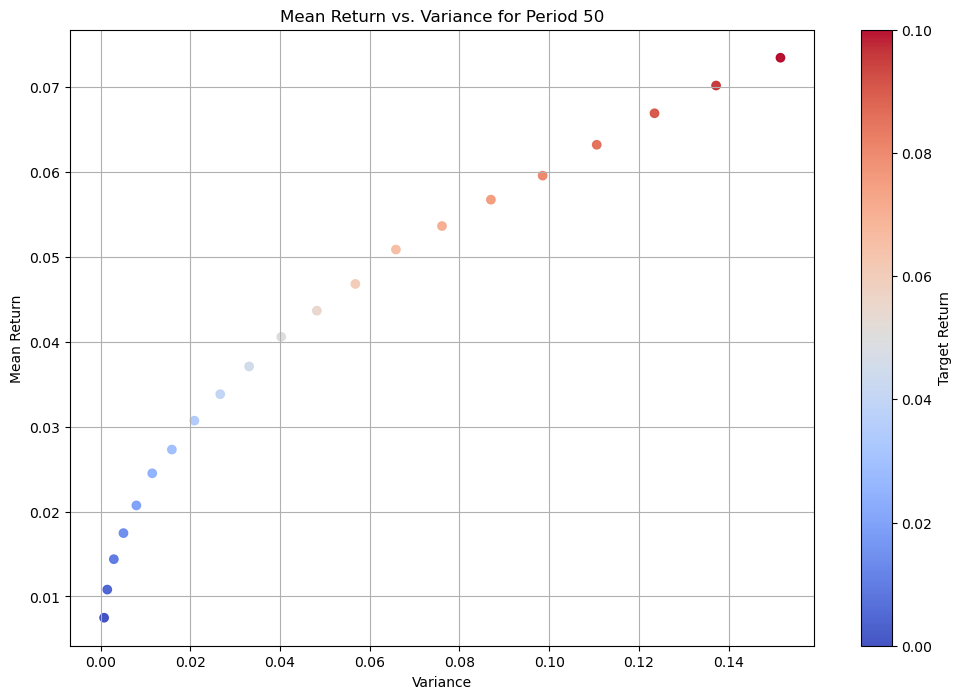

In [8]:
# Loop through each unique period and create a scatter plot
unique_periods = results['Period'].unique()

for period in unique_periods:
    plt.figure(figsize=(12, 8))
    
    # Filter data for the current period
    results_period = results[results['Period'] == period]
    
    # Scatter plot with color mapping based on 'Target_Return'
    scatter = plt.scatter(results_period['Variance'], results_period['Mean_Return'],
                          c=results_period['Target_Return'], cmap='coolwarm', alpha=0.95)
    
    plt.title(f'Mean Return vs. Variance for Period {period}')
    plt.xlabel('Variance')
    plt.ylabel('Mean Return')
    
    # Adding a color bar to show the mapping of colors to 'Target_Return'
    colorbar = plt.colorbar(scatter)
    colorbar.set_label('Target Return')
    
    plt.grid(True)
    plt.show()